### 1.0 LOAD LIBRARY

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from math import pi
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

### 2.0 READ DATASET

In [2]:
# Read Data
data_df = pd.read_csv('Data/Food_Production.csv')

# Print Shape of the dataset
print('The Shape of The Data is:', data_df.shape)

# Display a sample dataset
print('\n=== Head of Food Production Data ===')
print(f"{'=' * 50}\n")
display(data_df.head())

The Shape of The Data is: (43, 23)

=== Head of Food Production Data ===



Food product  Land use change  Animal Feed  Farm  Processing  \
0  Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1         Maize (Meal)              0.3          0.0   0.5         0.1   
2        Barley (Beer)              0.0          0.0   0.2         0.1   
3              Oatmeal              0.0          0.0   1.4         0.0   
4                 Rice              0.0          0.0   3.6         0.1   

   Transport  Packging  Retail  Total_emissions  \
0        0.1       0.1     0.1              1.4   
1        0.1       0.1     0.0              1.1   
2        0.0       0.5     0.3              1.1   
3        0.1       0.1     0.0              1.6   
4        0.1       0.1     0.1              4.0   

   Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  ...  \
0                                                NaN         ...   
1                                                NaN         ...   
2                                                NaN         ...   
3                                           4.281357         ...   
4                                           9.514379         ...   

   Freshwater withdrawals per 100g protein (liters per 100g protein)  \
0                                                NaN                   
1                                                NaN                   
2                                                NaN                   
3                                         371.076923                   
4                                        3166.760563                   

   Freshwater withdrawals per kilogram (liters per kilogram)  \
0                                                NaN           
1                                                NaN           
2                                                NaN           
3                                              482.4           
4                                             2248.4           

   Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                           0.945482              
4                                           1.207271              

   Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)  \
0                                                NaN                      
1                                                NaN                      
2                                                NaN                      
3                                           1.907692                      
4                                           6.267606                      

   Land use per 1000kcal (m² per 1000kcal)  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                 2.897446   
4                                 0.759631   

   Land use per kilogram (m² per kilogram)  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      7.6   
4                                      2.8   

   Land use per 100g protein (m² per 100g protein)  \
0                                              NaN   
1                                              NaN   
2                                              NaN   
3                                         5.846154   
4                                         3.943662   

   Scarcity-weighted water use per kilogram (liters per kilogram)  \
0                                                NaN                
1                                                NaN                
2                                                NaN                
3                     

### 3.0 DATA UNDERSTANDING

In [3]:
# Basic info
print('=== Basic Info ===')
print(f"{'=' * 50}")
data_df.info()

# Null values
print('\n\n=== Null Values per Column: ===')
print(f"{'=' * 50}")
print(data_df.isnull().sum())

# Percentage of null values
print('\n\n=== Percentage of Null Values per Column: ===')
print(f"{'=' * 50}")
print((data_df.isnull().sum() / data_df.shape[0]) * 100)

# Unique values in each column
print('\n\n=== Unique Values in Each Column: ===')
print(f"{'=' * 50}")
print(data_df.nunique())

print('\n\n=== Description of Dataset: ===')
print(f"{'=' * 50}")
data_df.describe()

=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                 

Land use change  Animal Feed       Farm  Processing  Transport  \
count        43.000000    43.000000  43.000000   43.000000  43.000000   
mean          1.260465     0.453488   3.469767    0.253488   0.195349   
std           3.357730     0.919200   7.083264    0.372475   0.158795   
min          -2.100000     0.000000   0.100000    0.000000   0.000000   
25%           0.000000     0.000000   0.350000    0.000000   0.100000   
50%           0.200000     0.000000   0.800000    0.100000   0.100000   
75%           0.800000     0.000000   2.200000    0.300000   0.200000   
max          16.300000     2.900000  39.400000    1.300000   0.800000   

        Packging     Retail  Total_emissions  \
count  43.000000  43.000000        43.000000   
mean    0.269767   0.069767         5.972093   
std     0.342633   0.110270        10.501753   
min     0.000000   0.000000         0.200000   
25%     0.100000   0.000000         0.850000   
50%     0.100000   0.000000         1.600000   
75%     0.300000   0.150000         6.000000   
max     1.600000   0.300000        59.600000   

       Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  \
count                                          33.000000          
mean                                           27.181547          
std                                            46.445959          
min                                             0.708419          
25%                                             4.214932          
50%                                             7.000000          
75%                                            26.324324          
max                                           197.357143          

       Eutrophying emissions per kilogram (gPO₄eq per kilogram)  ...  \
count                                          38.000000         ...   
mean                                           46.141316         ...   
std                                            82.808808         ...   
min                                             0.690000         ...   
25%                                             3.752500         ...   
50%                                            11.460000         ...   
75%                                            45.840000         ...   
max                                           365.290000         ...   

       Freshwater withdrawals per 100g protein (liters per 100g protein)  \
count                                          26.000000                   
mean                                         1437.975324                   
std                                          1441.981970                   
min                                            32.375000                   
25%                                           373.573281                   
50%                                          1083.327272                   
75%                                          1832.386339                   
max                                          6003.333333                   

       Freshwater withdrawals per kilogram (liters per kilogram)  \
count                                          38.000000           
mean                                          932.605263           
std                                          1296.999186           
min                                             0.000000           
25%                                           105.500000           
50%                                           417.100000           
75%                                          1340.375000           
max                                          5605.200000           

       Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)  \
count                                          33.000000              
mean                                            5.633943              
std                                            10.613575              
min                                             0.069919              
25%       

In [4]:
data_df.loc[:, 'Food product']

0     Wheat & Rye (Bread)
1            Maize (Meal)
2           Barley (Beer)
3                 Oatmeal
4                    Rice
5                Potatoes
6                 Cassava
7              Cane Sugar
8              Beet Sugar
9            Other Pulses
10                   Peas
11                   Nuts
12             Groundnuts
13                Soymilk
14                   Tofu
15            Soybean Oil
16               Palm Oil
17          Sunflower Oil
18           Rapeseed Oil
19              Olive Oil
20               Tomatoes
21         Onions & Leeks
22        Root Vegetables
23              Brassicas
24       Other Vegetables
25           Citrus Fruit
26                Bananas
27                 Apples
28       Berries & Grapes
29                   Wine
30            Other Fruit
31                 Coffee
32         Dark Chocolate
33       Beef (beef herd)
34      Beef (dairy herd)
35          Lamb & Mutton
36               Pig Meat
37           Poultry Meat
38          

In [5]:
# Get all column names
column_names = data_df.columns

# Print column names
print(column_names)

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

In [6]:
# Rename columns
data_df.rename(columns = {'Packging': 'Packaging'}, inplace = True)

data_df.rename(columns = {'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)': 'Eutrophying emissions per 1000kcal',
                          'Eutrophying emissions per kilogram (gPO₄eq per kilogram)': 'Eutrophying emissions per kilogram',
                          'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)': 'Eutrophying emissions per 100g protein',
                          'Freshwater withdrawals per 1000kcal (liters per 1000kcal)': 'Freshwater withdrawals per 1000kcal',
                          'Freshwater withdrawals per 100g protein (liters per 100g protein)': 'Freshwater withdrawals per 100g protein',
                          'Freshwater withdrawals per kilogram (liters per kilogram)': 'Freshwater withdrawals per kilogram',
                          'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)': 'Greenhouse gas emissions per 1000kcal',
                          'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)': 'Greenhouse gas emissions per 100g protein',
                          'Land use per 1000kcal (m² per 1000kcal)': 'Land use per 1000kcal',
                          'Land use per kilogram (m² per kilogram)': 'Land use per kilogram',
                          'Land use per 100g protein (m² per 100g protein)': 'Land use per 100g protein',
                          'Scarcity-weighted water use per kilogram (liters per kilogram)': 'Scarcity-weighted water use per kilogram',
                          'Scarcity-weighted water use per 100g protein (liters per 100g protein)': 'Scarcity-weighted water use per 100g protein',
                          'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)': 'Scarcity-weighted water use per 1000kcal'},
               inplace = True)

#Display the Result
data_df

Food product  Land use change  Animal Feed  Farm  Processing  \
0   Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1          Maize (Meal)              0.3          0.0   0.5         0.1   
2         Barley (Beer)              0.0          0.0   0.2         0.1   
3               Oatmeal              0.0          0.0   1.4         0.0   
4                  Rice              0.0          0.0   3.6         0.1   
5              Potatoes              0.0          0.0   0.2         0.0   
6               Cassava              0.6          0.0   0.2         0.0   
7            Cane Sugar              1.2          0.0   0.5         0.0   
8            Beet Sugar              0.0          0.0   0.5         0.2   
9          Other Pulses              0.0          0.0   1.1         0.0   
10                 Peas              0.0          0.0   0.7         0.0   
11                 Nuts             -2.1          0.0   2.1         0.0   
12           Groundnuts              0.4          0.0   1.4         0.4   
13              Soymilk              0.2          0.0   0.1         0.2   
14                 Tofu              1.0          0.0   0.5         0.8   
15          Soybean Oil              3.1          0.0   1.5         0.3   
16             Palm Oil              3.1          0.0   2.1         1.3   
17        Sunflower Oil              0.1          0.0   2.1         0.2   
18         Rapeseed Oil              0.2          0.0   2.3         0.2   
19            Olive Oil             -0.4          0.0   4.3         0.7   
20             Tomatoes              0.4          0.0   0.7         0.0   
21       Onions & Leeks              0.0          0.0   0.2         0.0   
22      Root Vegetables              0.0          0.0   0.2         0.0   
23            Brassicas              0.0          0.0   0.3         0.0   
24     Other Vegetables              0.0          0.0   0.2         0.1   
25         Citrus Fruit             -0.1          0.0   0.3         0.0   
26              Bananas              0.0          0.0   0.3         0.1   
27               Apples              0.0          0.0   0.2         0.0   
28     Berries & Grapes              0.0          0.0   0.7         0.0   
29                 Wine             -0.1          0.0   0.6         0.1   
30          Other Fruit              0.1          0.0   0.4         0.0   
31               Coffee              3.7          0.0  10.4         0.6   
32       Dark Chocolate             14.3          0.0   3.7         0.2   
33     Beef (beef herd)             16.3          1.9  39.4         1.3   
34    Beef (dairy herd)              0.9          2.5  15.7         1.1   
35        Lamb & Mutton              0.5          2.4  19.5         1.1   
36             Pig Meat              1.5          2.9   1.7         0.3   
37         Poultry Meat              2.5          1.8   0.7         0.4   
38                 Milk              0.5          0.2   1.5         0.1   
39               Cheese              4.5          2.3  13.1         0.7   
40                 Eggs              0.7          2.2   1.3         0.0   
41        Fish (farmed)              0.5          0.8   3.6         0.0   
42     Shrimps (farmed)              0.2          2.5   8.4         0.0   

    Transport  Packaging  Retail  Total_emissions  \
0         0.1        0.1     0.1              1.4   
1         0.1        0.1     0.0              1.1   
2         0.0        0.5     0.3              1.1   
3         0.1        0.1     0.0              1.6   
4         0.1        0.1     0.1              4.0   
5         0.1        0.0     0.0              0.3   
6         0.1        0.0     0.0              0.9   
7         0.8        0.1     0.0              2.6   
8         0.6        0.1     0.0              1.4   
9         0.1        0.4     0.0              1.6   
10        0.1        0.0     0.0              0.8   
11        0.1        0.1     0.0              0.2   
12        0.1        

`Comment:`

- There are **43** unique **Food Products in the dataset**.
- There are 23 columns and 43 rows. Data on emissions for each step of production and total emissions are present for all food products, while there are null values for additional environmental impacts.
- Also, there is only one column reporting the food product name, then the first 7 columns report the emissions for each step of production for that product, followed by the total emissions. Then, there are columns reporting different effects on the environment.
- All the columns are numeric except **Food Product** column.
- There is **no null values** in the columns reporting the emission for each step of production, however, there are missing values in the columns reporting additional environmental impacts with *Freshwater withdrawals per 100g protein* and *Scarcity-weighted water use per 100g protein* having the highest **null values** of **39.5%** each followed by *Eutrophying emissions per 100g protein*, *Greenhouse gas emissions per 100g protein*, and *Land use per 100g protein* with **37.2%** each.

### 4.0 EXPLORATORY DATA ANALYSIS (EDA)

In [7]:
# Set plot style
sns.set_style('whitegrid')
#plt.rcParams['font.family'] = 'DejaVu Sans'  # Use a font that supports subscripts

# Select numerical columns
numerical_columns = data_df.select_dtypes(include = ['float64']).columns

# Create subplots for histograms with KDE + boxplots
fig, axes = plt.subplots(nrows = len(numerical_columns), ncols = 2, figsize = (12, len(numerical_columns) * 4))

for i, column in enumerate(numerical_columns):
    # Histogram with KDE plot
    sns.histplot(data_df[column], kde = True, ax = axes[i, 0], bins = 30, color = 'skyblue')
    axes[i, 0].set_title(f"Distribution of {column}")
    
    # Boxplot
    sns.boxplot(x = data_df[column], ax = axes[i, 1], color = 'lightcoral')
    axes[i, 1].set_title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

`Comment:`

- All the distributions above are right-skewed (positively skewed). That is:
    - Most values are clustered near zero with a long tail extending to the right.
    - The mean of the data is greater than the median.
    - There are a few large values (outliers) pulling the mean higher

- Also, the boxplots confirm the presence of several outliers (dots beyond the whiskers).

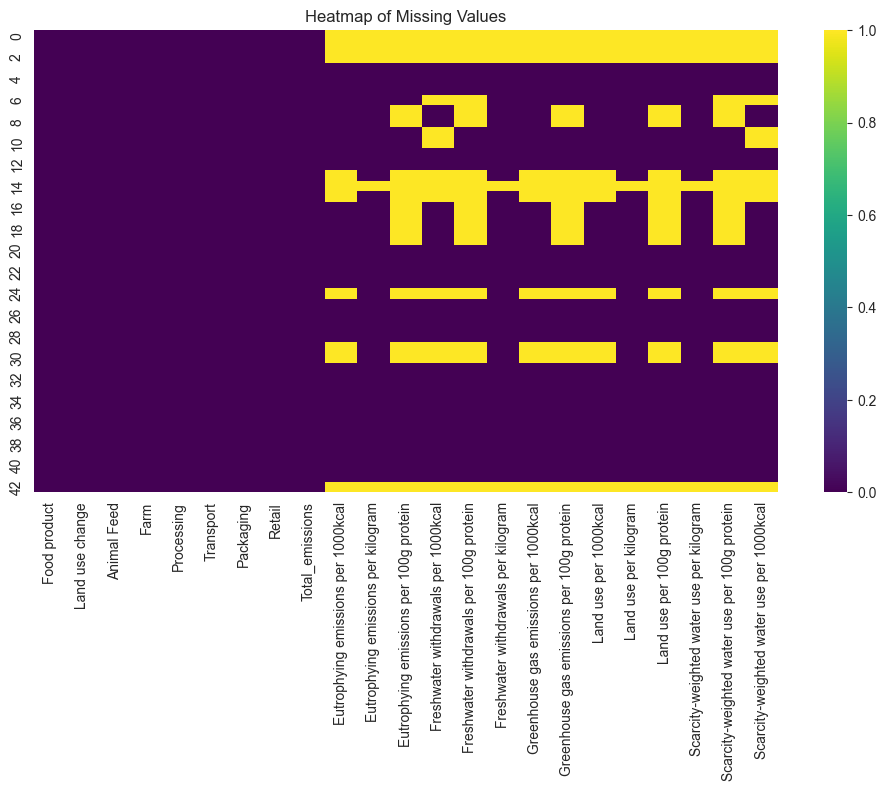

In [8]:
# Heatmap of null values
plt.figure(figsize = (12, 6))
sns.heatmap(data_df.isnull(), cmap = 'viridis')
plt.title('Heatmap of Missing Values')
plt.show()

`Comment:`

- From the heatmap above:
    - **missing values** are not randomly distributed
    - **Purple** colour indicates no missing values while **Yellow** indicates missing values

In [9]:
# Fill all missing values in the dataset with 0
data_df = data_df.fillna(0)

# Verify if there are any remaining missing values
data_df.isnull().sum().sum()

0

`Comment:`

- To keep all rows and columns in the data for analysis without losing most of the insights, dropping or filling null values with anything other than zero (0) may not be ideal. This is because, missing value for some food product may not necessarily be input error or unavailability but negligible values while some maybe not applicable hence, I opted to fill them with zero to keep all relevant values in the data.

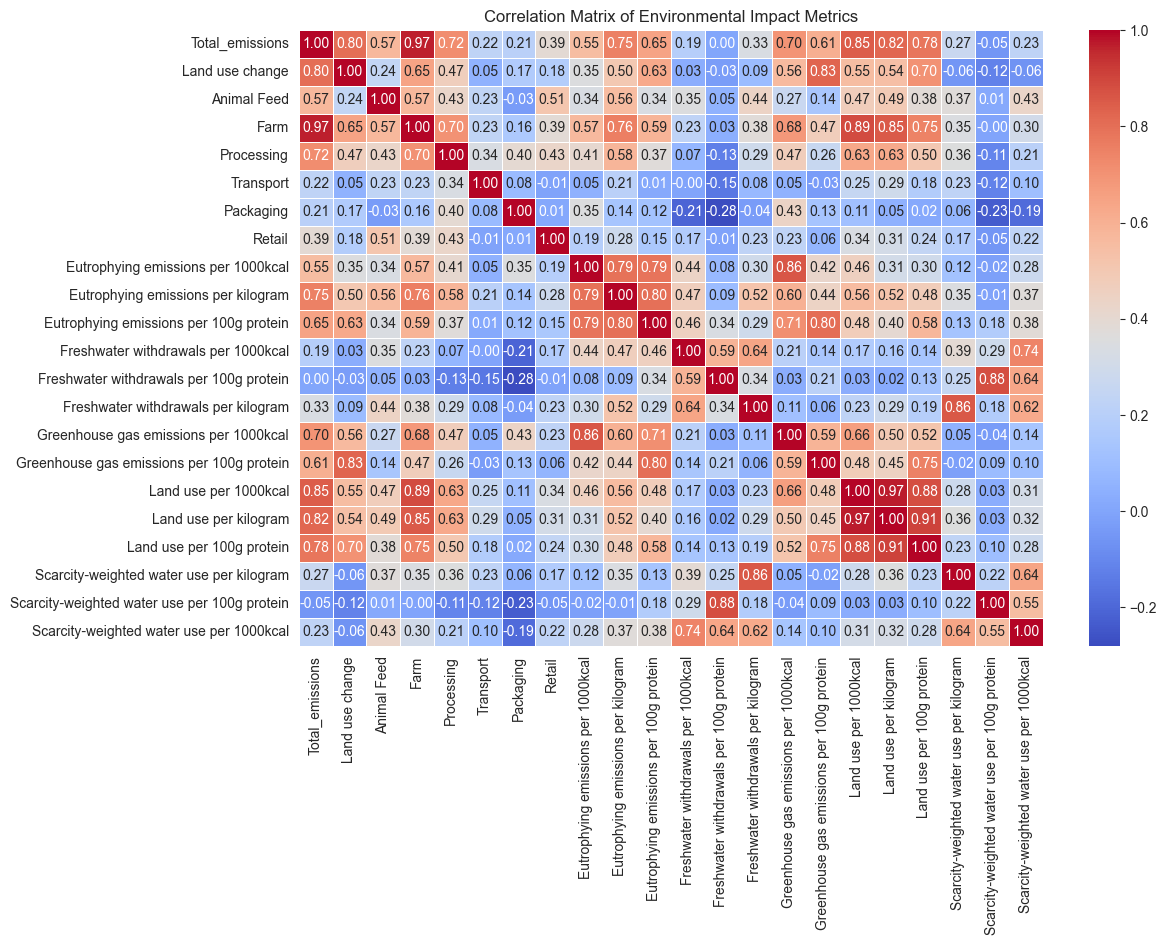

In [10]:
# Select relevant numeric columns
selected_columns = [
    'Total_emissions', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
    'Transport', 'Packaging', 'Retail', 'Eutrophying emissions per 1000kcal',
    'Eutrophying emissions per kilogram', 'Eutrophying emissions per 100g protein',
    'Freshwater withdrawals per 1000kcal', 'Freshwater withdrawals per 100g protein',
    'Freshwater withdrawals per kilogram', 'Greenhouse gas emissions per 1000kcal',
    'Greenhouse gas emissions per 100g protein', 'Land use per 1000kcal',
    'Land use per kilogram', 'Land use per 100g protein',
    'Scarcity-weighted water use per kilogram', 'Scarcity-weighted water use per 100g protein',
    'Scarcity-weighted water use per 1000kcal'
]

# Filter dataset for selected metrics
df_selected = data_df[selected_columns]

# Compute correlation matrix
correlation_matrix = df_selected.corr()

# Plot heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix of Environmental Impact Metrics')
plt.show()

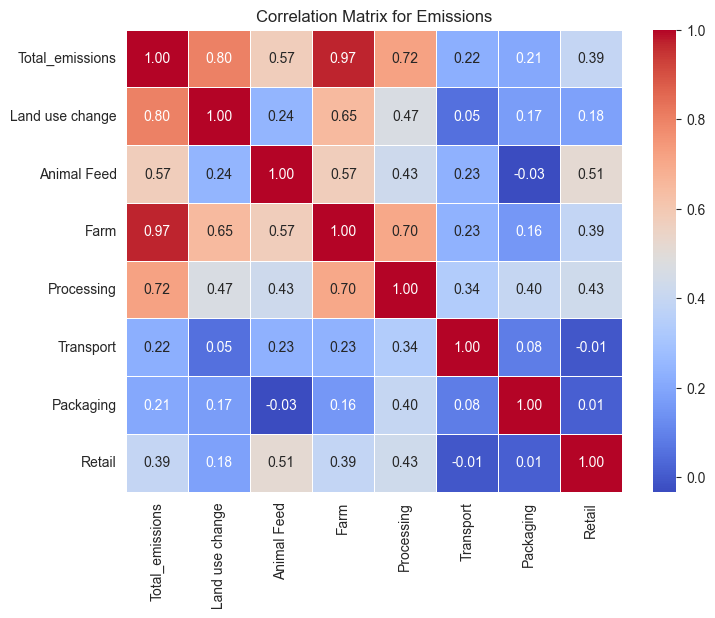

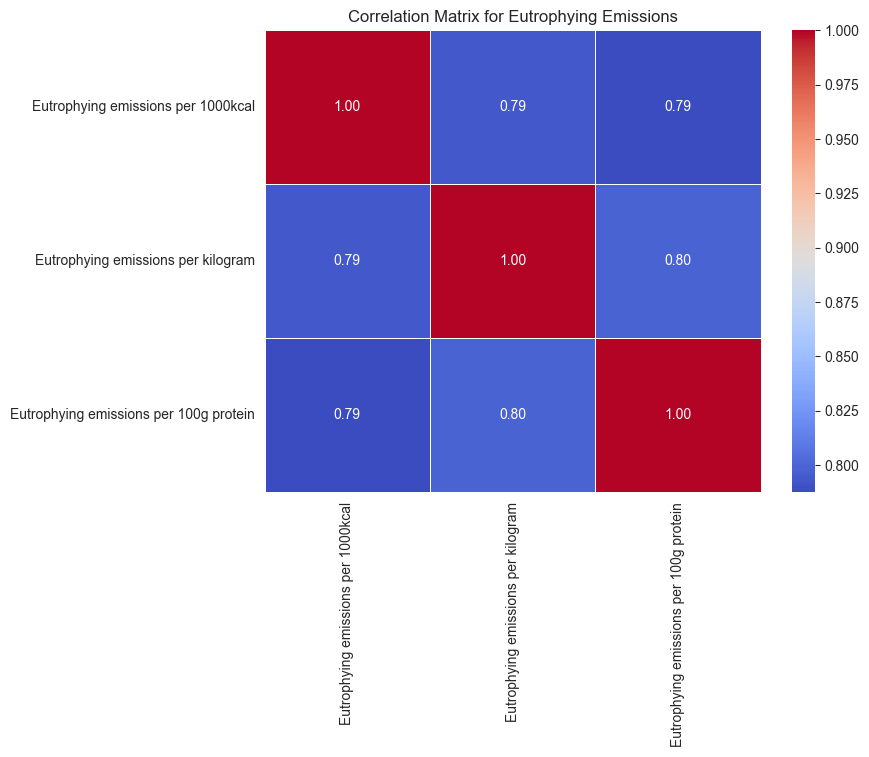

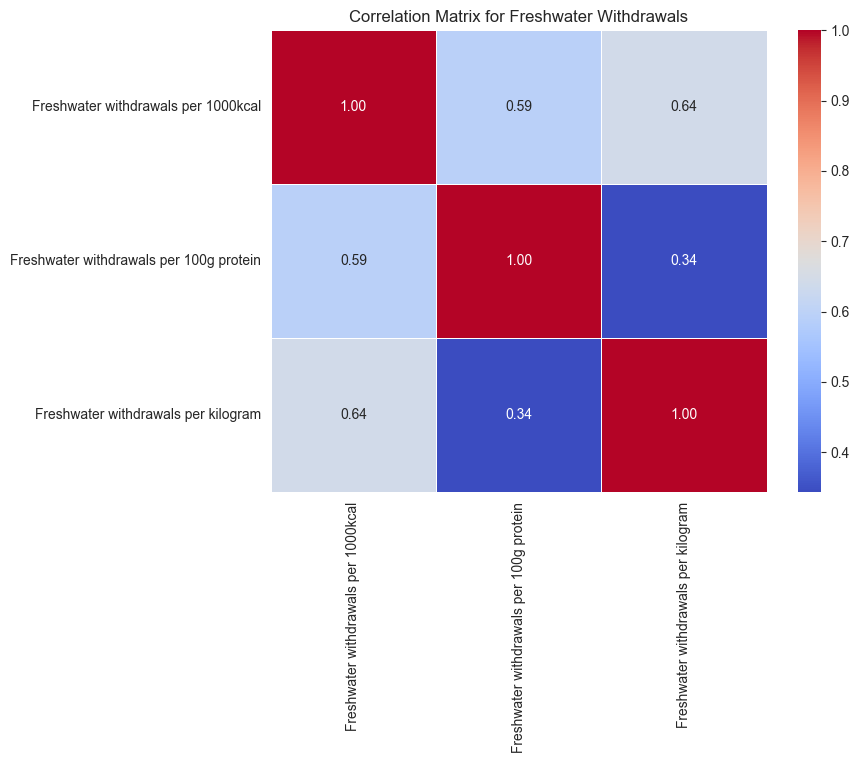

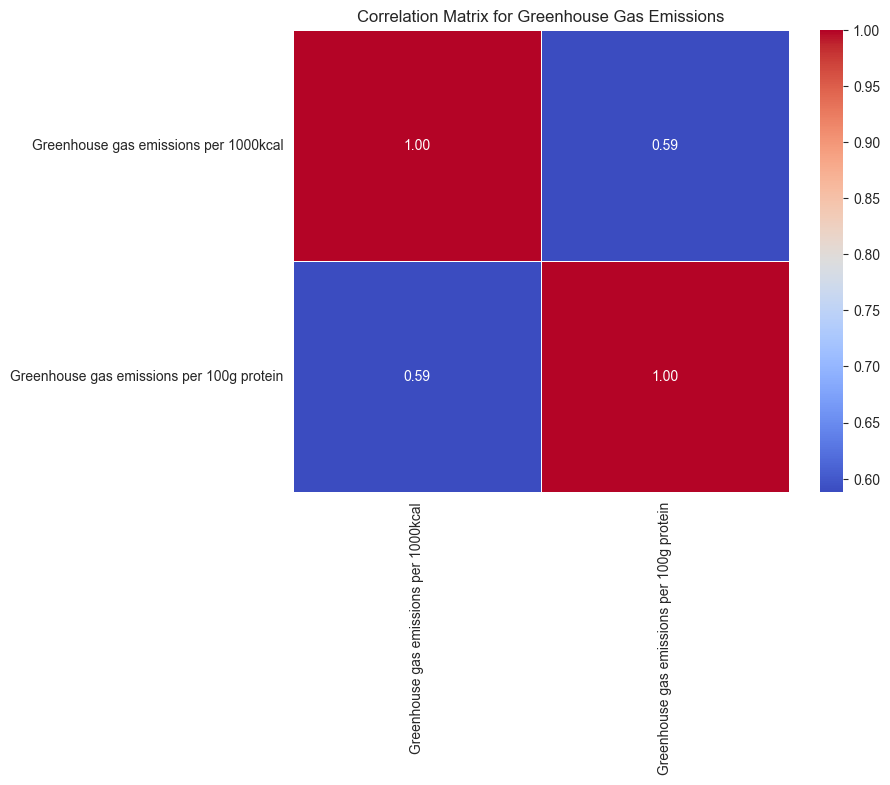

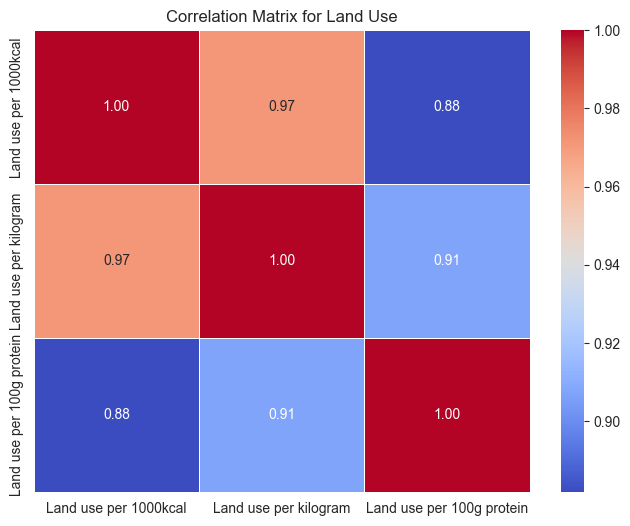

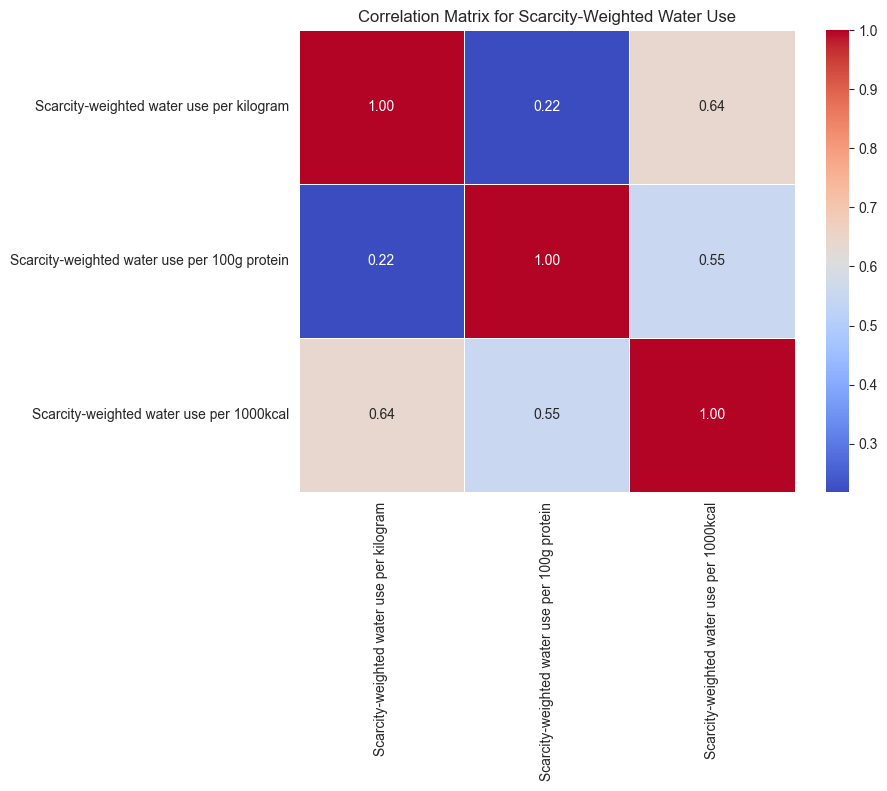

In [11]:
# Define column groups
groups = {
    'Emissions': ['Total_emissions', 'Land use change', 'Animal Feed', 'Farm', 'Processing', 'Transport', 'Packaging', 'Retail'],
    'Eutrophying Emissions': ['Eutrophying emissions per 1000kcal', 'Eutrophying emissions per kilogram', 'Eutrophying emissions per 100g protein'],
    'Freshwater Withdrawals': ['Freshwater withdrawals per 1000kcal', 'Freshwater withdrawals per 100g protein', 'Freshwater withdrawals per kilogram'],
    'Greenhouse Gas Emissions': ['Greenhouse gas emissions per 1000kcal', 'Greenhouse gas emissions per 100g protein'],
    'Land Use': ['Land use per 1000kcal', 'Land use per kilogram', 'Land use per 100g protein'],
    'Scarcity-Weighted Water Use': ['Scarcity-weighted water use per kilogram', 'Scarcity-weighted water use per 100g protein', 'Scarcity-weighted water use per 1000kcal']
}

# Function to plot correlation heatmap for a given group
def plot_correlation_heatmap(group_name, columns):
    if all(col in data_df.columns for col in columns):  # Ensure all columns exist in dataset
        corr_matrix = data_df[columns].corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
        plt.title(f"Correlation Matrix for {group_name}")
        plt.show()
    else:
        print(f"Some columns in {group_name} are missing from the dataset.")

# Generate heatmaps for each group
for group_name, columns in groups.items():
    plot_correlation_heatmap(group_name, columns)

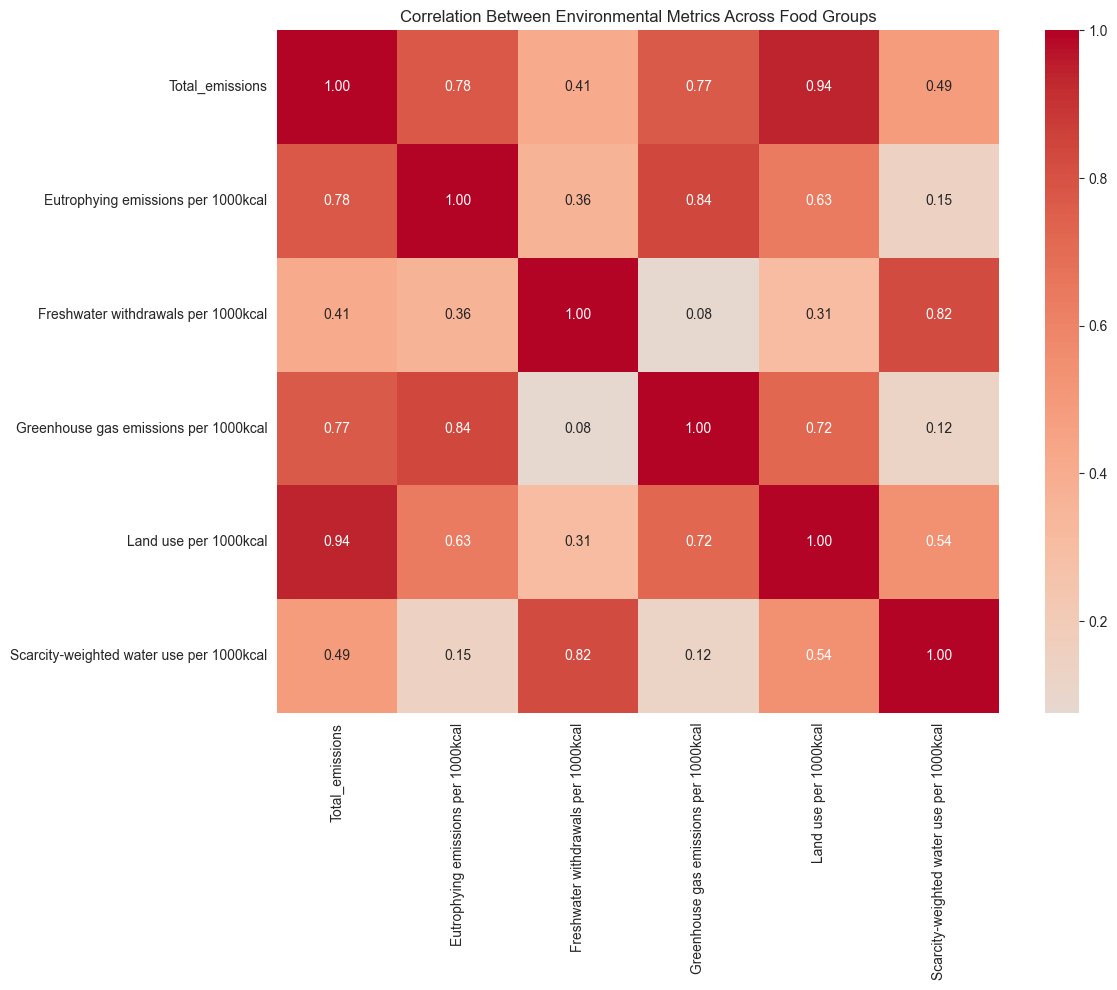


=== Total_emissions ===


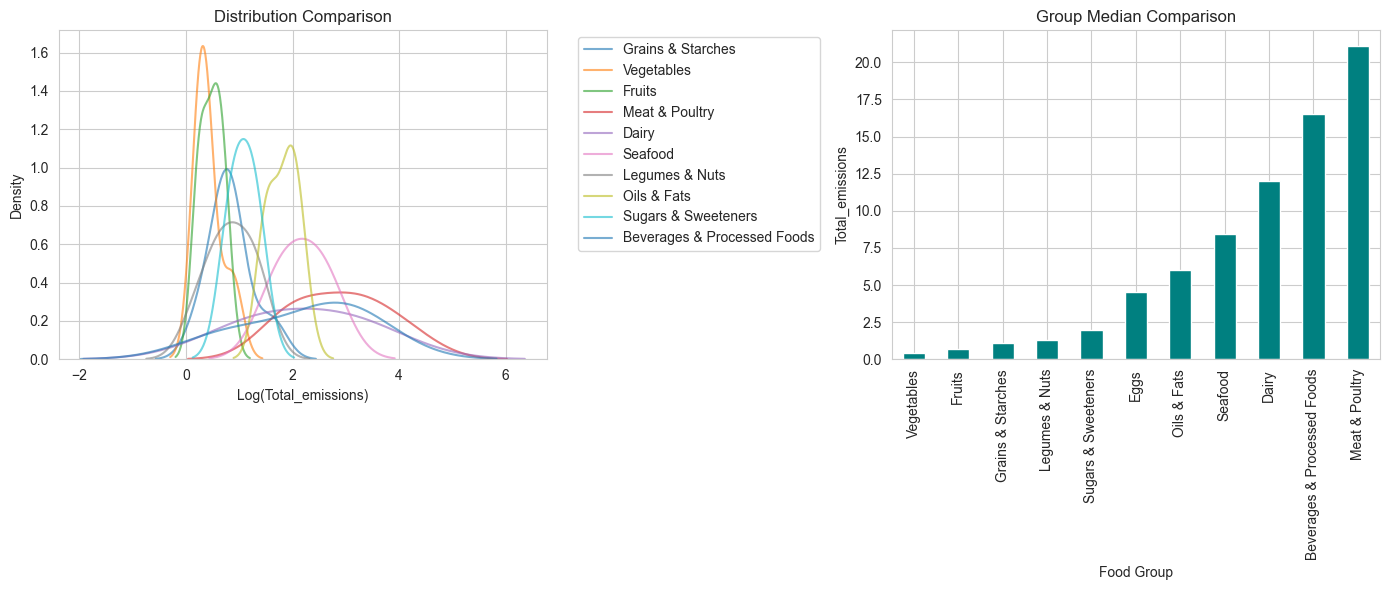

Kruskal-Wallis p-value: 3.346e-04
Significant differences exist between groups

=== Eutrophying emissions per 1000kcal ===


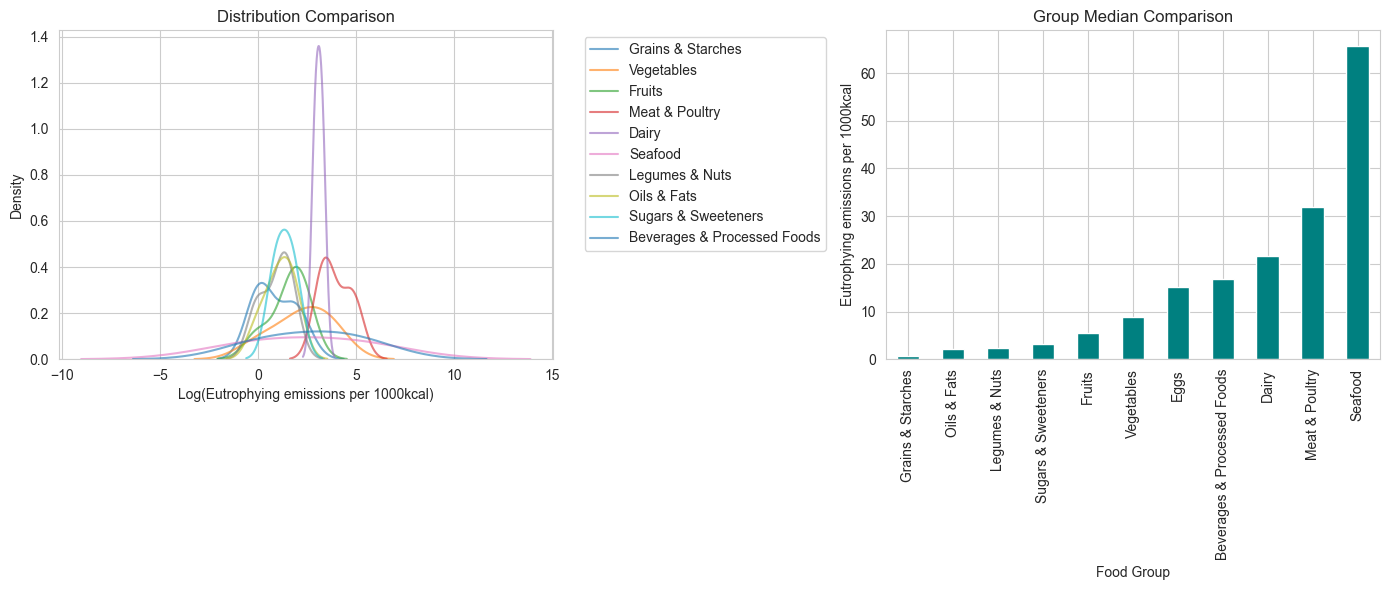

Kruskal-Wallis p-value: 4.160e-02
Significant differences exist between groups

=== Freshwater withdrawals per 1000kcal ===


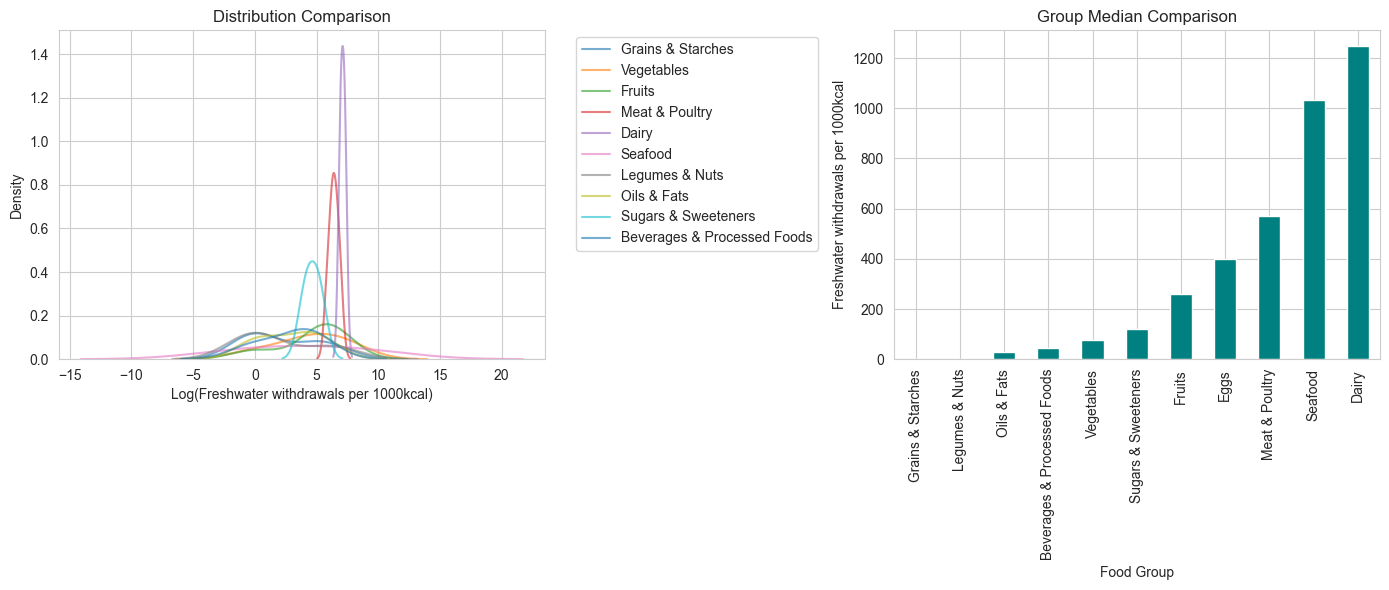

Kruskal-Wallis p-value: 8.112e-02
No significant differences between groups

=== Greenhouse gas emissions per 1000kcal ===


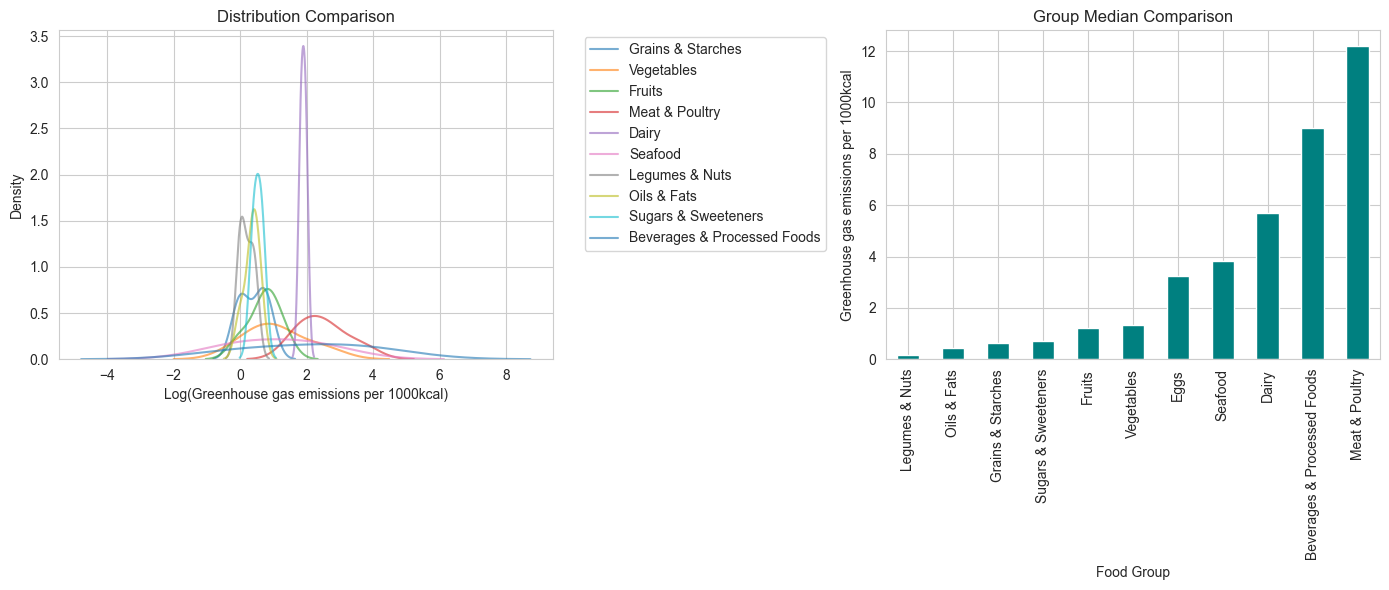

Kruskal-Wallis p-value: 2.118e-02
Significant differences exist between groups

=== Land use per 1000kcal ===


Kruskal-Wallis p-value: 2.489e-02
Significant differences exist between groups

=== Scarcity-weighted water use per 1000kcal ===


Kruskal-Wallis p-value: 8.932e-02
No significant differences between groups

=== Environmental Impact Profiles by Food Group ===


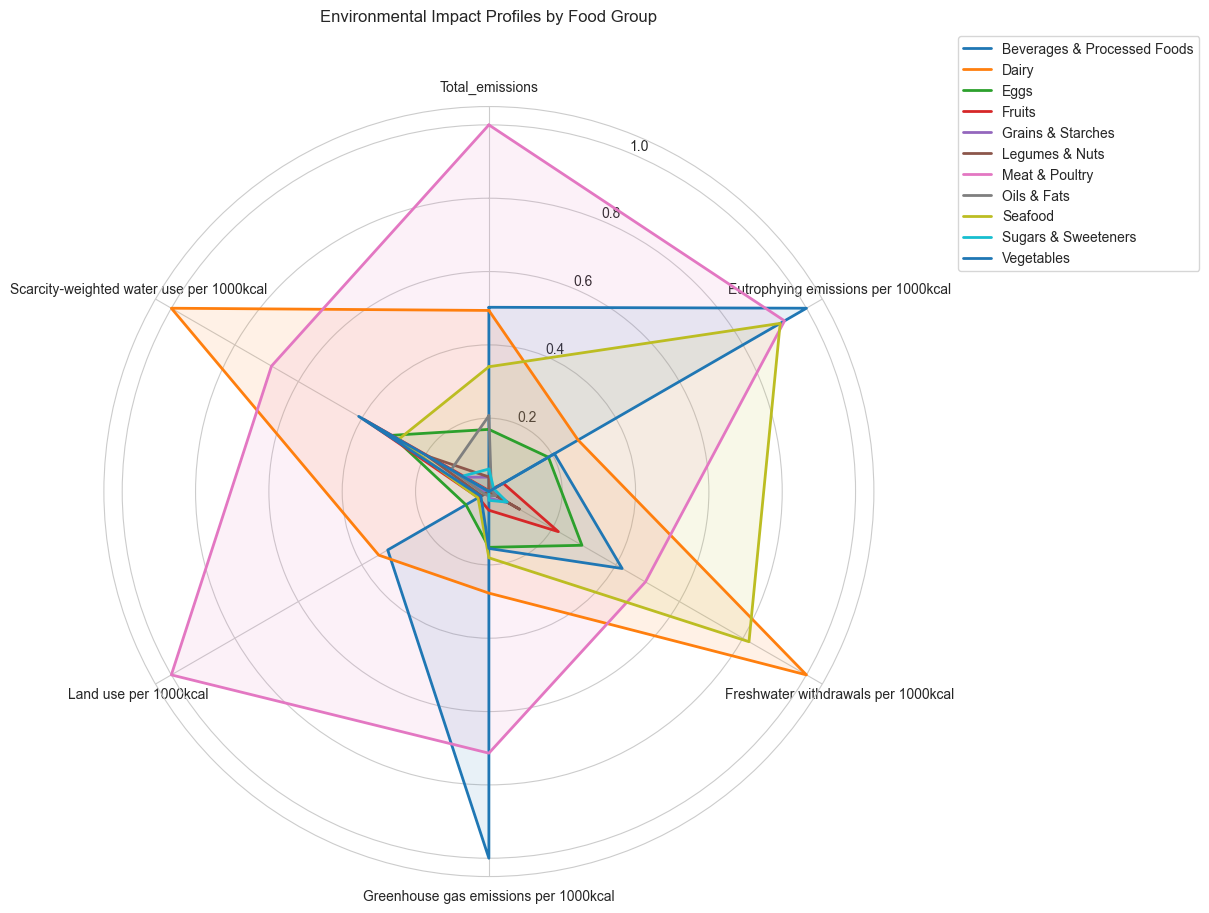

In [12]:
# Make a copy of the dataset
df = data_df.copy()

# Define food groups
food_groups = {
    'Grains & Starches': ['Wheat & Rye (Bread)', 'Maize (Meal)', 'Barley (Beer)', 'Oatmeal', 'Rice', 'Potatoes', 'Cassava'],
    'Vegetables': ['Tomatoes', 'Onions & Leeks', 'Root Vegetables', 'Brassicas', 'Other Vegetables'],
    'Fruits': ['Citrus Fruit', 'Bananas', 'Apples', 'Berries & Grapes', 'Other Fruit'],
    'Meat & Poultry': ['Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton', 'Pig Meat', 'Poultry Meat'],
    'Dairy': ['Milk', 'Cheese'],
    'Eggs': ['Eggs'],
    'Seafood': ['Fish (farmed)', 'Shrimps (farmed)'],
    'Legumes & Nuts': ['Other Pulses', 'Peas', 'Nuts', 'Groundnuts', 'Soymilk', 'Tofu'],
    'Oils & Fats': ['Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil', 'Olive Oil'],
    'Sugars & Sweeteners': ['Cane Sugar', 'Beet Sugar'],
    'Beverages & Processed Foods': ['Wine', 'Coffee', 'Dark Chocolate']
}

# Add food group column
df['Food Group'] = None  # Use None for better compatibility
for group, products in food_groups.items():
    df.loc[df['Food product'].isin(products), 'Food Group'] = group

# Metrics for correlation analysis (Per-1000kcal)
metrics = [
    'Total_emissions',
    'Eutrophying emissions per 1000kcal',
    'Freshwater withdrawals per 1000kcal',
    'Greenhouse gas emissions per 1000kcal',
    'Land use per 1000kcal',
    'Scarcity-weighted water use per 1000kcal'
]

# Group Correlation Matrix
group_means = df.groupby('Food Group')[metrics].mean()

plt.figure(figsize = (12, 10))
sns.heatmap(group_means.corr(), annot = True, cmap = 'coolwarm', center = 0, fmt = '.2f', annot_kws = {'size': 10})
plt.title('Correlation Between Environmental Metrics Across Food Groups')
plt.tight_layout()
plt.show()

# Pairwise Group Comparisons
def plot_group_comparisons(metric):
    plt.figure(figsize = (14, 6))
    
    # Distribution plot
    plt.subplot(1, 2, 1)
    for group in food_groups.keys():
        data = df[df['Food Group'] == group][metric].dropna()
        if not data.empty:
            sns.kdeplot(np.log1p(data + 1e-6), label = group, alpha = 0.6)  # Avoid log(0)
    
    plt.xlabel(f'Log({metric})')
    plt.title('Distribution Comparison')
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
    
    # Median comparison
    plt.subplot(1, 2, 2)
    group_medians = df.groupby('Food Group')[metric].median().sort_values()
    group_medians.plot(kind = 'bar', color = 'teal')
    plt.xticks(rotation = 90)
    plt.title('Group Median Comparison')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()

# Analyze metrics
for metric in metrics:
    print(f'\n=== {metric} ===')
    plot_group_comparisons(metric)
    
    # Kruskal-Wallis test
    samples = [df[df['Food Group'] == group][metric].dropna() for group in food_groups.keys()]
    samples = [s for s in samples if len(s) > 1]  # Ensure at least 2 groups have data
    if len(samples) > 1:
        h_stat, p_val = stats.kruskal(*samples)
        print(f'Kruskal-Wallis p-value: {p_val:.3e}')
        print('Significant differences exist between groups' if p_val < 0.05 else 'No significant differences between groups')
    else:
        print('Not enough data for statistical comparison')



# Environmental Impact Profile Radar Chart

print(f'\n=== Environmental Impact Profiles by Food Group ===')
radar_metrics = group_means.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

categories = radar_metrics.columns.tolist()
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize = (10, 10))
ax = plt.subplot(111, polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)

for group, row in radar_metrics.iterrows():
    values = row.values.tolist() + [row.values[0]]
    ax.plot(angles, values, linewidth = 2, linestyle = 'solid', label = group)
    ax.fill(angles, values, alpha = 0.1)

plt.title('Environmental Impact Profiles by Food Group', y = 1.1)
plt.legend(bbox_to_anchor = (1.1, 1.1))
plt.show()


=== Total_emissions ===


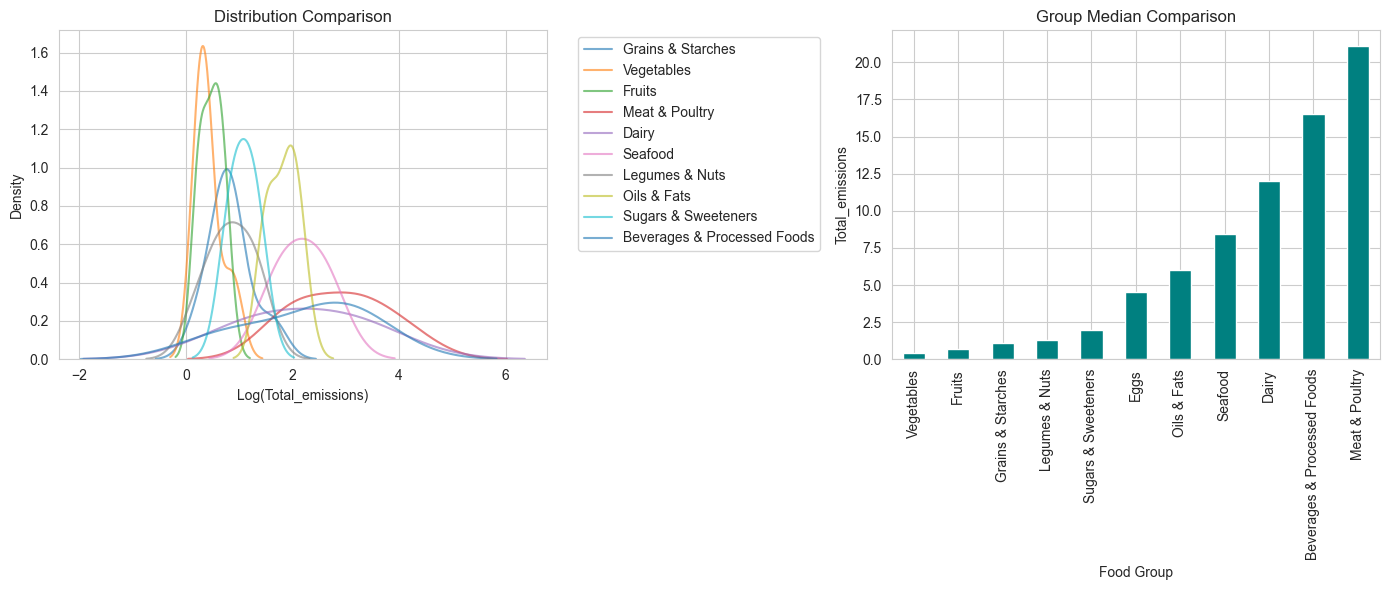

Kruskal-Wallis p-value: 3.346e-04
Significant differences exist between groups

=== Eutrophying emissions per kilogram ===


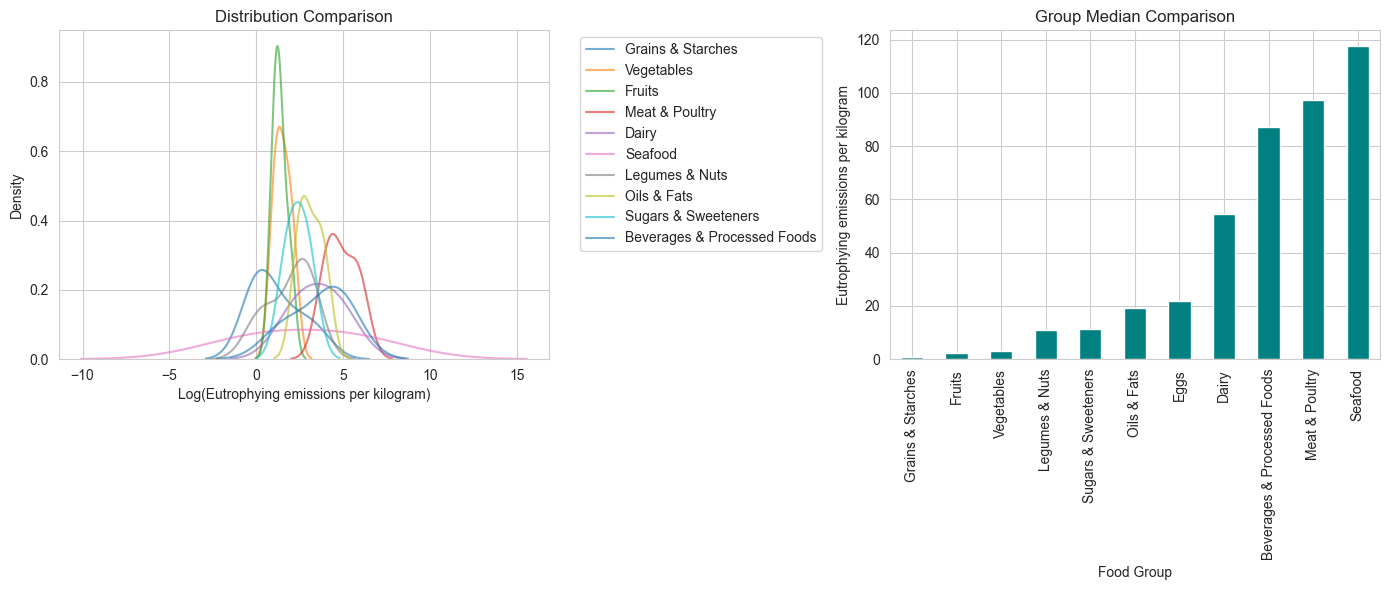

Kruskal-Wallis p-value: 9.644e-03
Significant differences exist between groups

=== Freshwater withdrawals per kilogram ===


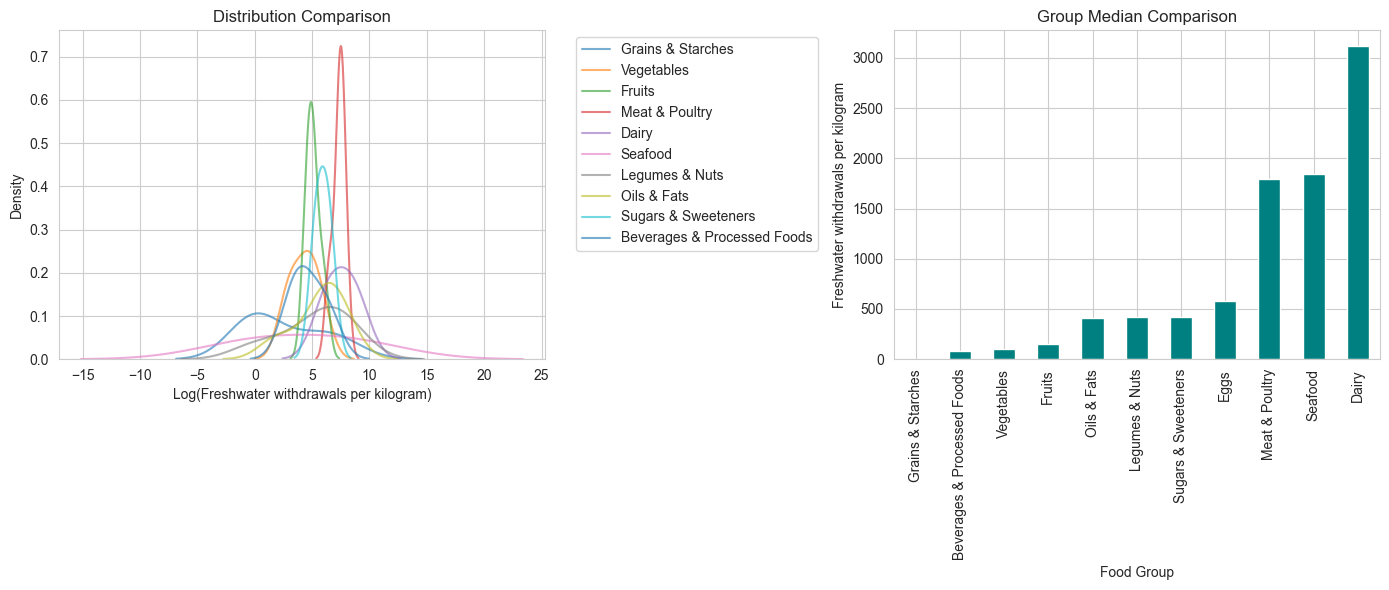

Kruskal-Wallis p-value: 1.033e-01
No significant differences between groups

=== Land use per kilogram ===


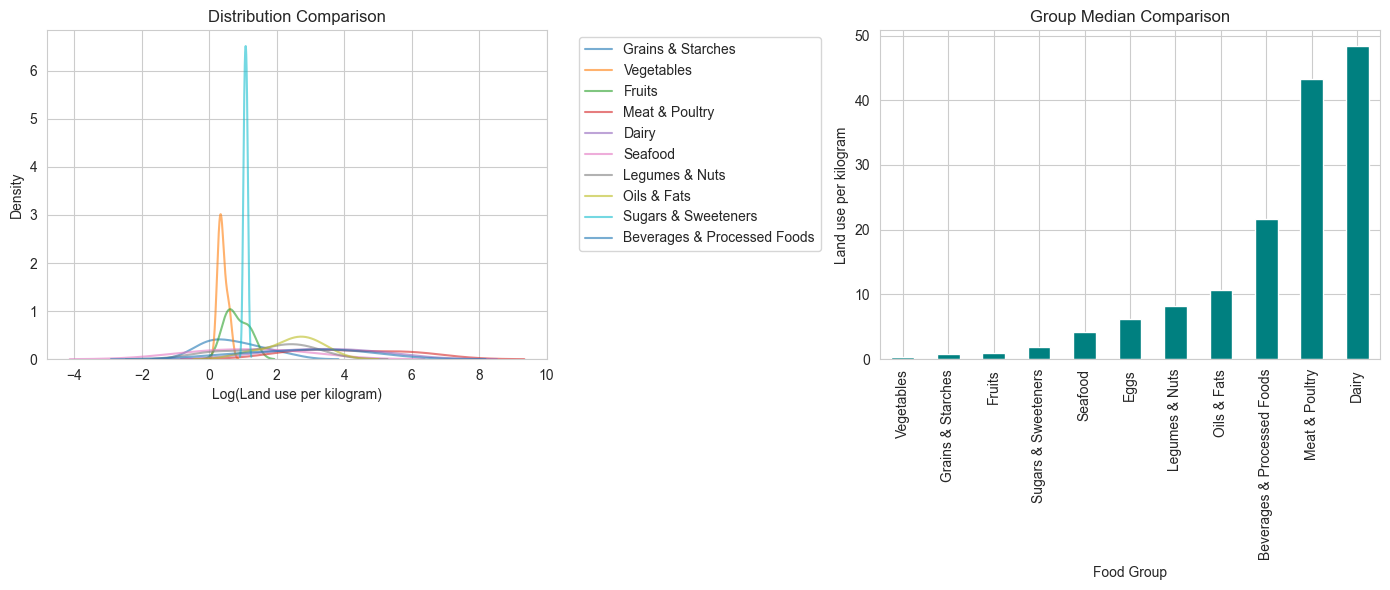

Kruskal-Wallis p-value: 2.240e-03
Significant differences exist between groups

=== Scarcity-weighted water use per kilogram ===


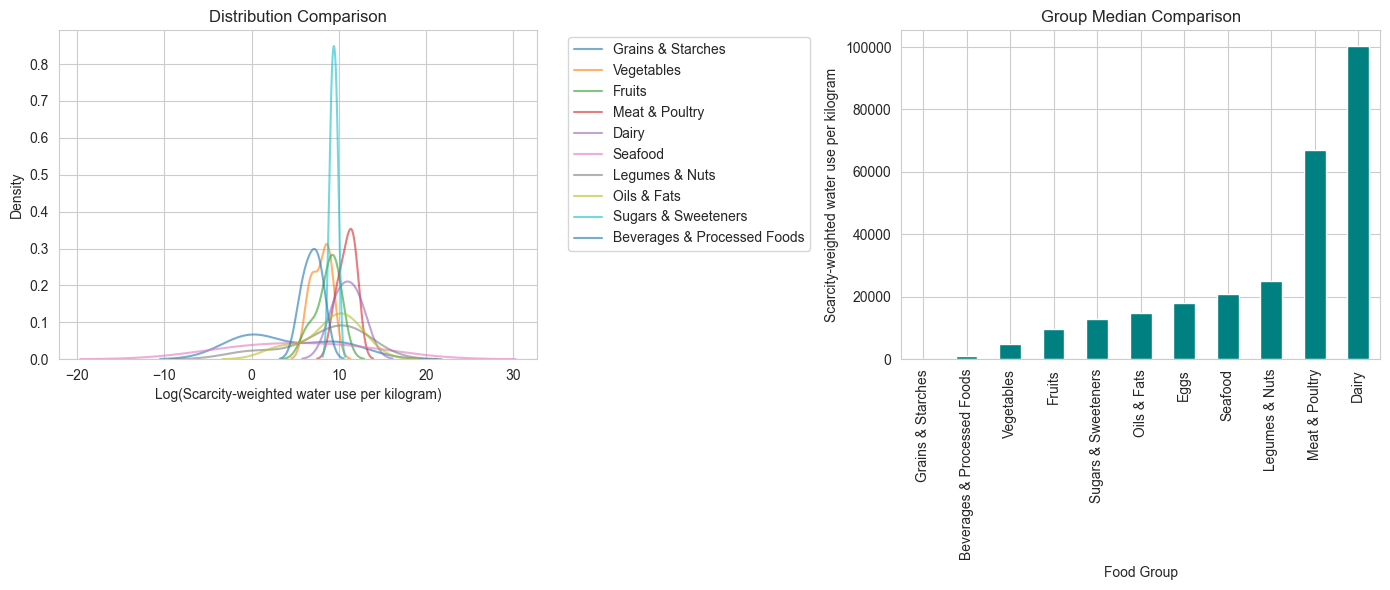

Kruskal-Wallis p-value: 7.493e-02
No significant differences between groups

=== Environmental Impact Profiles by Food Group ===


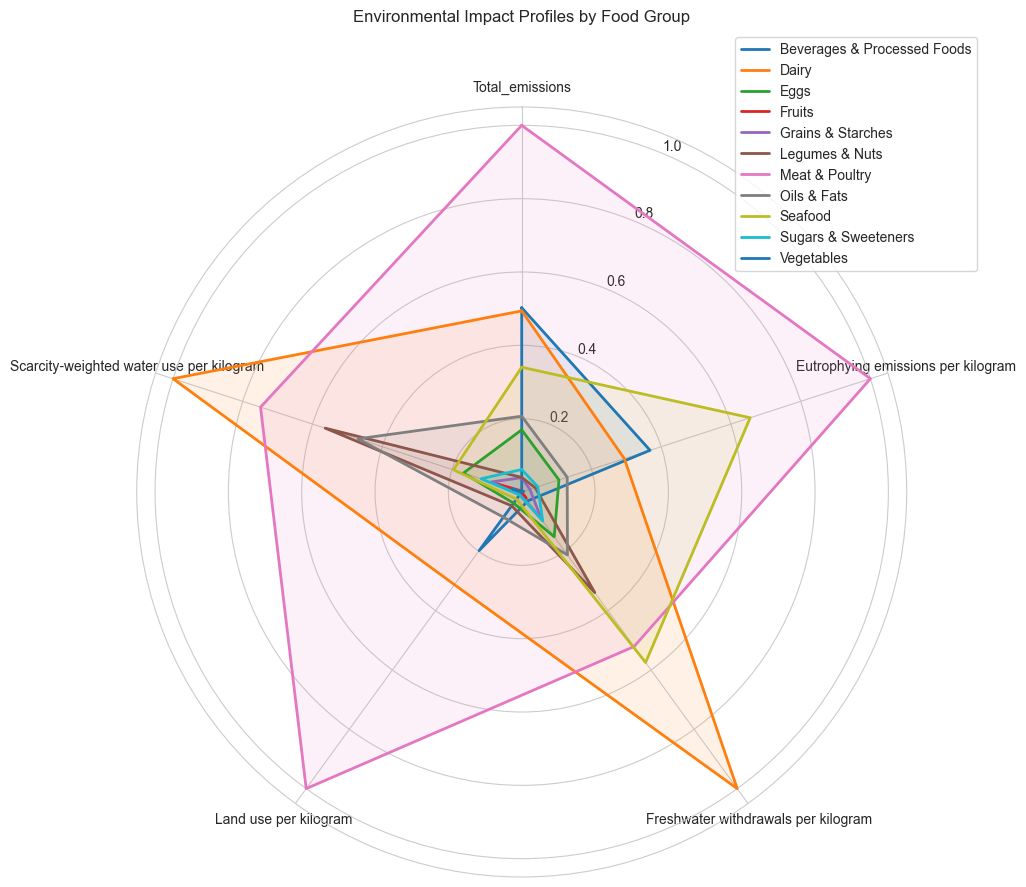

In [13]:
# Metrics for correlation analysis (Per-kilogram)
metrics = [
    'Total_emissions',
    'Eutrophying emissions per kilogram',
    'Freshwater withdrawals per kilogram',
    'Land use per kilogram',
    'Scarcity-weighted water use per kilogram'
]

# Group Correlation Matrix
group_means = df.groupby('Food Group')[metrics].mean()

plt.figure(figsize = (12, 10))
sns.heatmap(group_means.corr(), annot = True, cmap = 'coolwarm', center = 0, fmt = '.2f', annot_kws = {'size': 10})
plt.title('Correlation Between Environmental Metrics Across Food Groups')
plt.tight_layout()
plt.show()

# Pairwise Group Comparisons
def plot_group_comparisons(metric):
    plt.figure(figsize = (14, 6))
    
    # Distribution plot
    plt.subplot(1, 2, 1)
    for group in food_groups.keys():
        data = df[df['Food Group'] == group][metric].dropna()
        if not data.empty:
            sns.kdeplot(np.log1p(data + 1e-6), label = group, alpha = 0.6)  # Avoid log(0)
    
    plt.xlabel(f'Log({metric})')
    plt.title('Distribution Comparison')
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
    
    # Median comparison
    plt.subplot(1, 2, 2)
    group_medians = df.groupby('Food Group')[metric].median().sort_values()
    group_medians.plot(kind = 'bar', color = 'teal')
    plt.xticks(rotation = 90)
    plt.title('Group Median Comparison')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()

# Analyze metrics
for metric in metrics:
    print(f'\n=== {metric} ===')
    plot_group_comparisons(metric)
    
    # Kruskal-Wallis test
    samples = [df[df['Food Group'] == group][metric].dropna() for group in food_groups.keys()]
    samples = [s for s in samples if len(s) > 1]  # Ensure at least 2 groups have data
    if len(samples) > 1:
        h_stat, p_val = stats.kruskal(*samples)
        print(f'Kruskal-Wallis p-value: {p_val:.3e}')
        print('Significant differences exist between groups' if p_val < 0.05 else 'No significant differences between groups')
    else:
        print('Not enough data for statistical comparison')



# Environmental Impact Profile Radar Chart

print(f'\n=== Environmental Impact Profiles by Food Group ===')
radar_metrics = group_means.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

categories = radar_metrics.columns.tolist()
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize = (10, 10))
ax = plt.subplot(111, polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)

for group, row in radar_metrics.iterrows():
    values = row.values.tolist() + [row.values[0]]
    ax.plot(angles, values, linewidth = 2, linestyle = 'solid', label = group)
    ax.fill(angles, values, alpha = 0.1)

plt.title('Environmental Impact Profiles by Food Group', y = 1.1)
plt.legend(bbox_to_anchor = (1.1, 1.1))
plt.show()

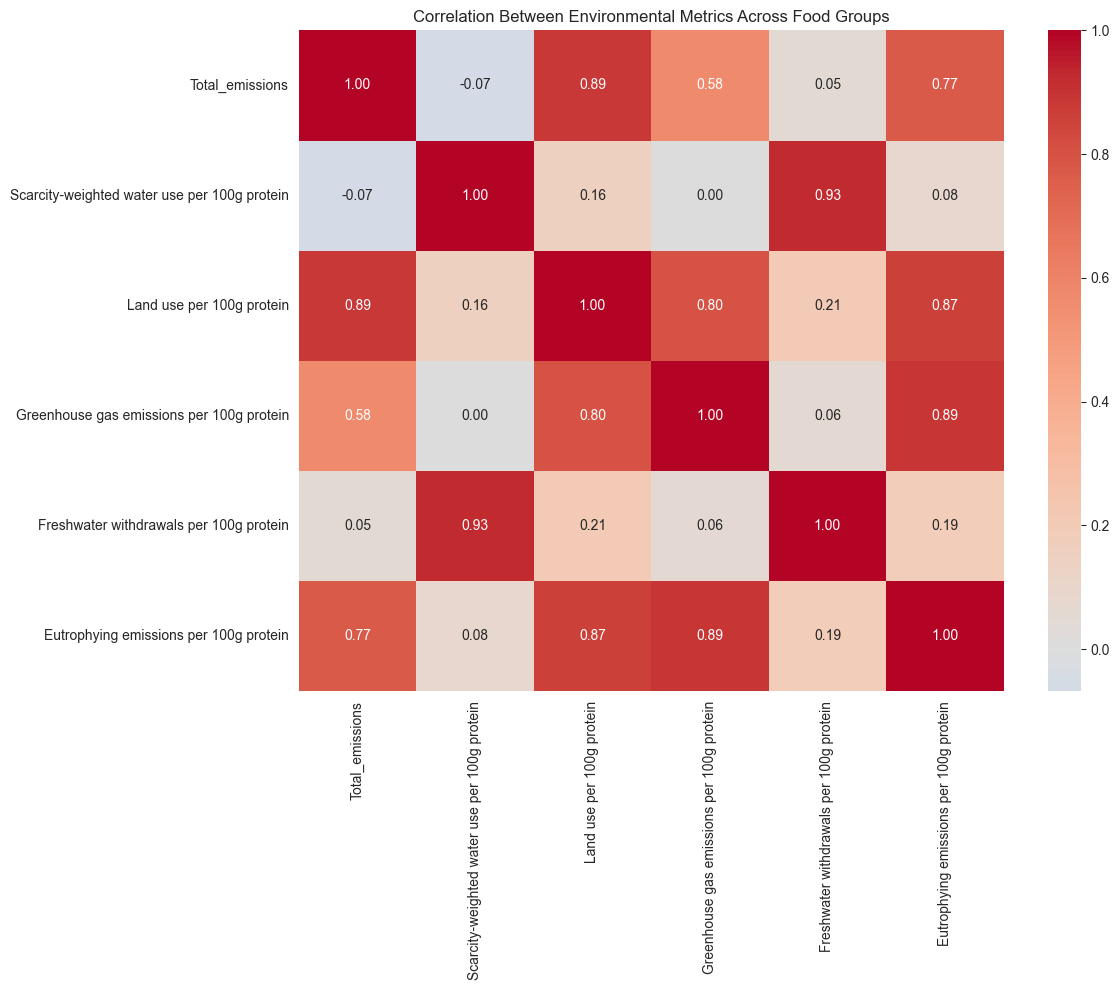


=== Total_emissions ===


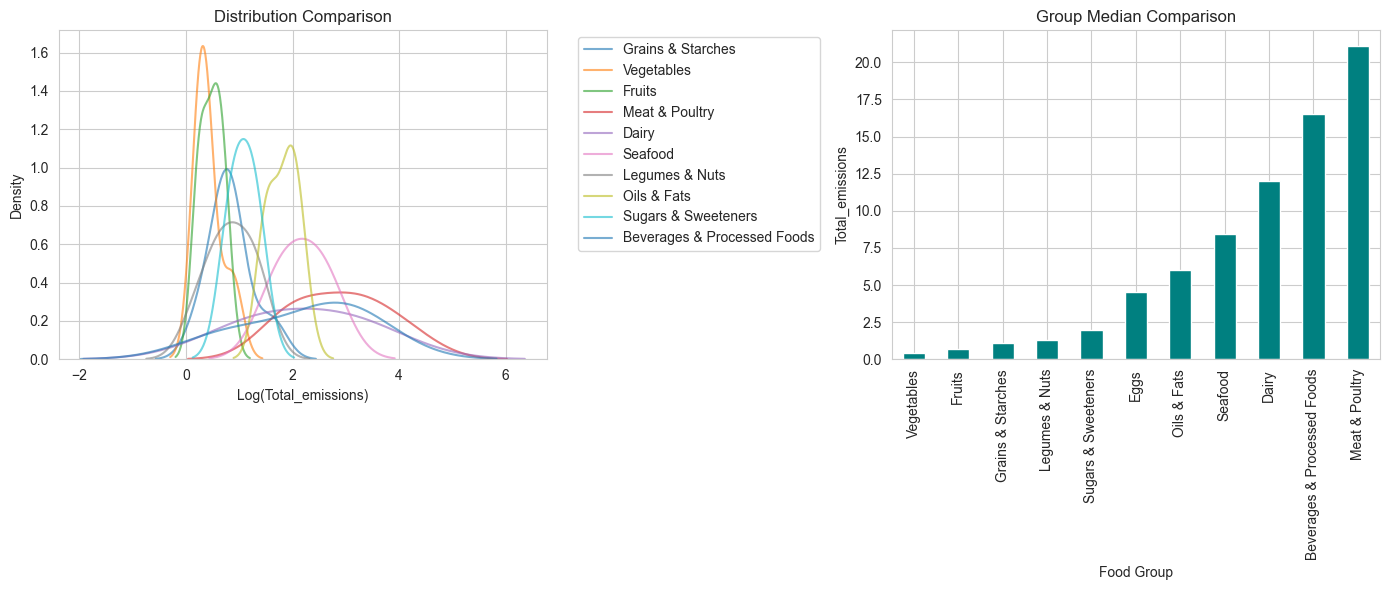

Kruskal-Wallis p-value: 3.346e-04
Significant differences exist between groups

=== Scarcity-weighted water use per 100g protein ===


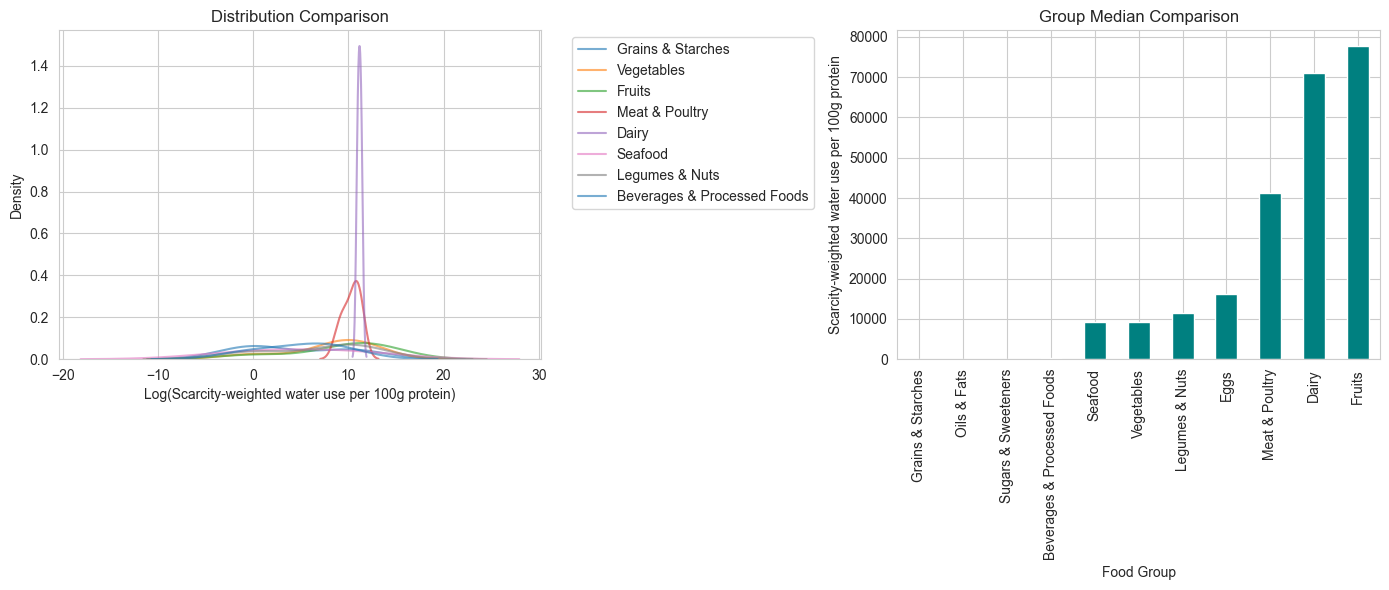

Kruskal-Wallis p-value: 3.393e-02
Significant differences exist between groups

=== Land use per 100g protein ===


Kruskal-Wallis p-value: 6.057e-03
Significant differences exist between groups

=== Greenhouse gas emissions per 100g protein ===


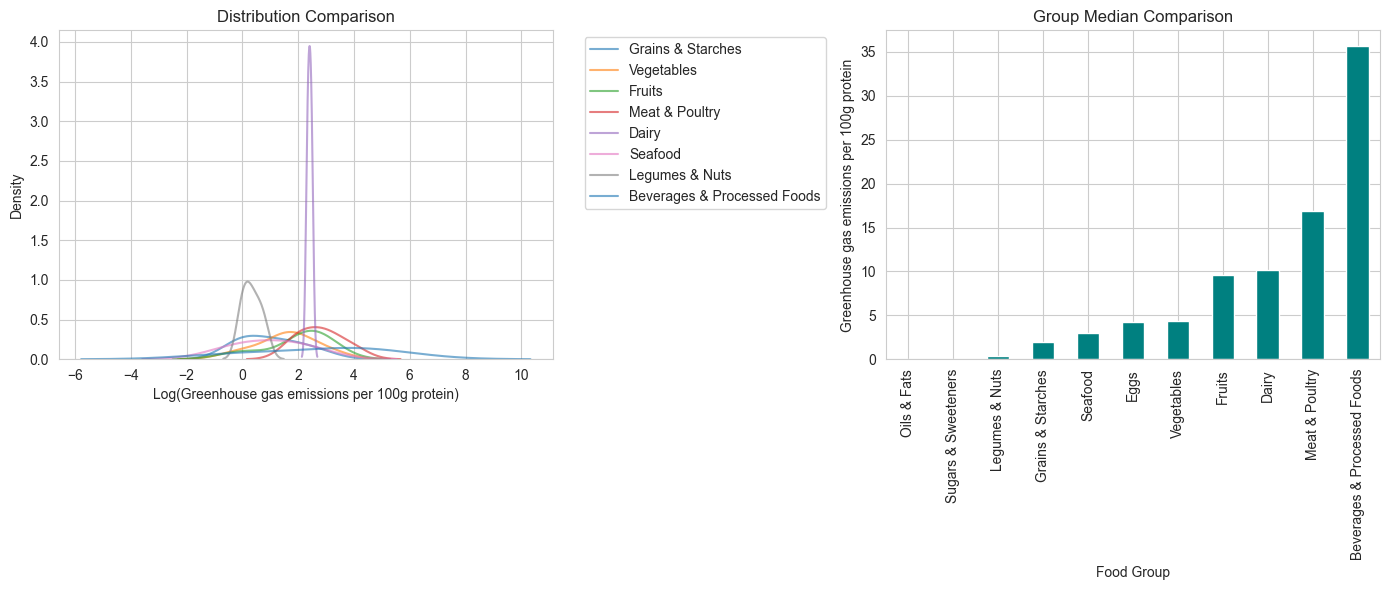

Kruskal-Wallis p-value: 1.118e-02
Significant differences exist between groups

=== Freshwater withdrawals per 100g protein ===


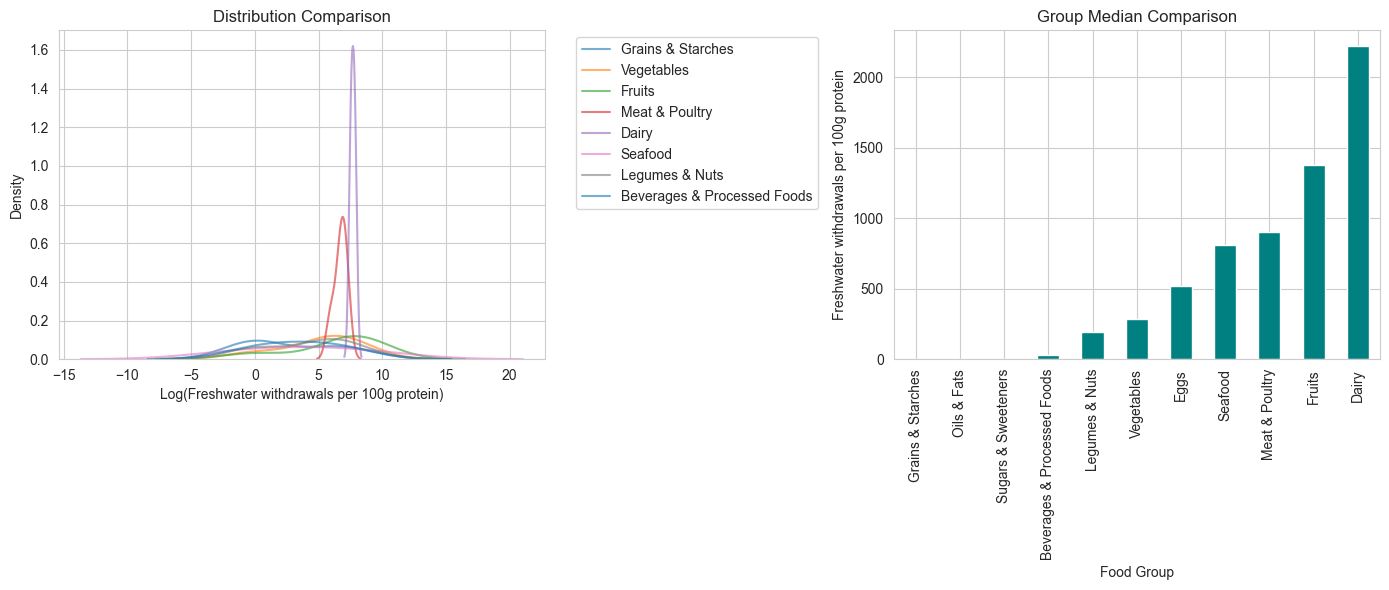

Kruskal-Wallis p-value: 3.510e-02
Significant differences exist between groups

=== Eutrophying emissions per 100g protein ===


Kruskal-Wallis p-value: 1.691e-02
Significant differences exist between groups

=== Environmental Impact Profiles by Food Group ===


In [14]:
# Metrics for correlation analysis (Per-100g protein)
metrics = [
    'Total_emissions',
    'Scarcity-weighted water use per 100g protein',
    'Land use per 100g protein',
    'Greenhouse gas emissions per 100g protein',
    'Freshwater withdrawals per 100g protein',
    'Eutrophying emissions per 100g protein'
]

# Group Correlation Matrix
group_means = df.groupby('Food Group')[metrics].mean()

plt.figure(figsize = (12, 10))
sns.heatmap(group_means.corr(), annot = True, cmap = 'coolwarm', center = 0, fmt = '.2f', annot_kws = {'size': 10})
plt.title('Correlation Between Environmental Metrics Across Food Groups')
plt.tight_layout()
plt.show()

# Pairwise Group Comparisons
def plot_group_comparisons(metric):
    plt.figure(figsize = (14, 6))
    
    # Distribution plot
    plt.subplot(1, 2, 1)
    for group in food_groups.keys():
        data = df[df['Food Group'] == group][metric].dropna()
        if not data.empty:
            sns.kdeplot(np.log1p(data + 1e-6), label = group, alpha = 0.6)  # Avoid log(0)
    
    plt.xlabel(f'Log({metric})')
    plt.title('Distribution Comparison')
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 'upper left')
    
    # Median comparison
    plt.subplot(1, 2, 2)
    group_medians = df.groupby('Food Group')[metric].median().sort_values()
    group_medians.plot(kind = 'bar', color = 'teal')
    plt.xticks(rotation = 90)
    plt.title('Group Median Comparison')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()

# Analyze metrics
for metric in metrics:
    print(f'\n=== {metric} ===')
    plot_group_comparisons(metric)
    
    # Kruskal-Wallis test
    samples = [df[df['Food Group'] == group][metric].dropna() for group in food_groups.keys()]
    samples = [s for s in samples if len(s) > 1]  # Ensure at least 2 groups have data
    if len(samples) > 1:
        h_stat, p_val = stats.kruskal(*samples)
        print(f'Kruskal-Wallis p-value: {p_val:.3e}')
        print('Significant differences exist between groups' if p_val < 0.05 else 'No significant differences between groups')
    else:
        print('Not enough data for statistical comparison')



# Environmental Impact Profile Radar Chart

print(f'\n=== Environmental Impact Profiles by Food Group ===')
radar_metrics = group_means.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

categories = radar_metrics.columns.tolist()
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize = (10, 10))
ax = plt.subplot(111, polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)

for group, row in radar_metrics.iterrows():
    values = row.values.tolist() + [row.values[0]]
    ax.plot(angles, values, linewidth = 2, linestyle = 'solid', label = group)
    ax.fill(angles, values, alpha = 0.1)

plt.title('Environmental Impact Profiles by Food Group', y = 1.1)
plt.legend(bbox_to_anchor = (1.1, 1.1))
plt.show()

### 5.0 ANALYSIS

> > ### 5.1 Total Emission
> >  `Questions:`
> > - Which food products have the highest total carbon footprint across their production lifecycle?
> > - How do food transportation emissions vary based on the type of food groups?
> > - How does land use change contribute to the overall greenhouse gas emissions of different food products?

In [15]:
# Sort the data by Total_emissions in descending order
top_emitters = data_df[['Food product', 'Total_emissions']].sort_values(by = 'Total_emissions', ascending = False)

# Display the top 10 food products with the highest total carbon footprint
top_emitters.head(10)

Food product  Total_emissions
33   Beef (beef herd)             59.6
35      Lamb & Mutton             24.5
39             Cheese             21.2
34  Beef (dairy herd)             21.1
32     Dark Chocolate             18.7
31             Coffee             16.5
42   Shrimps (farmed)             11.8
16           Palm Oil              7.6
36           Pig Meat              7.2
37       Poultry Meat              6.1

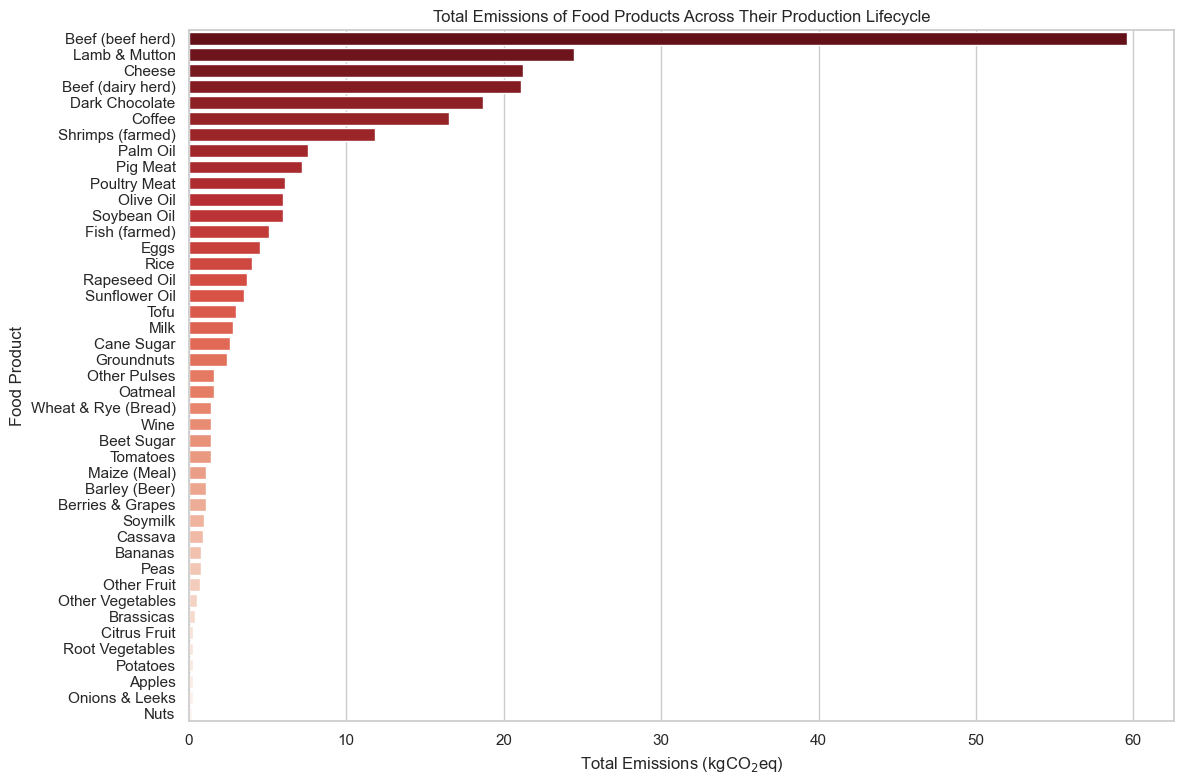

In [16]:
# Plotting style
plt.figure(figsize = (12, 8))
sns.set_theme(style = 'whitegrid')

# Plot total emissions for all food products
sorted_df = df.sort_values(by = 'Total_emissions', ascending = False)

# Create a barplot
sns.barplot(
    data = sorted_df,
    y = 'Food product',
    x = 'Total_emissions',
    palette = 'Reds_r'
)

# Add plot labels and title
plt.title('Total Emissions of Food Products Across Their Production Lifecycle')
plt.xlabel('Total Emissions (kgCO$_2$eq)')
plt.ylabel('Food Product')

plt.tight_layout()
plt.show()

`Comment:`

- At the production level, the **Total Emission** refers to the Greenhouse Gases (GHG) per kilogram of food product during the overall food production cycle. This encompasses GHG from the various steps of the production cycle. That is, from Land use change through to Retail.
- From the above analysis, Beef (beef herd), Lamb & Mutton, Cheese, and Beef (dairy herd) are the top 4 carbon footprint emitters with more than 20kg CO$_2$ equivalents per kilogram of food product.
- At the top, animal-based foods contribute higher carbon footprints compared to plant-based foods.
- At the bottom, the least GHG emissions contributors are plant-based foods, such as root vegetables, potatoes, apples, onions & leeks and nuts.

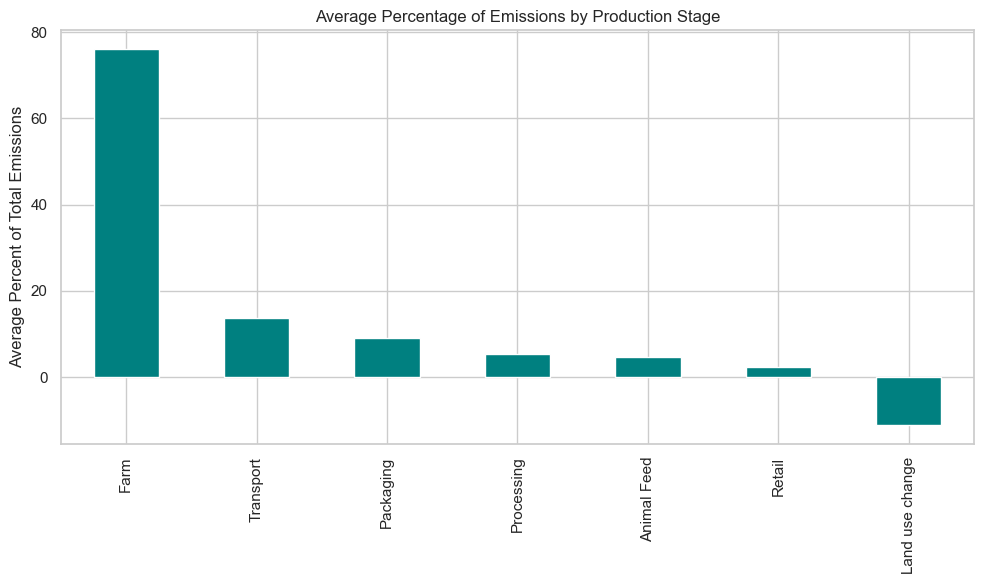

In [17]:
# Production stage columns
stage_columns = [
    'Land use change',
    'Animal Feed',
    'Farm',
    'Processing',
    'Transport',
    'Packaging',
    'Retail'
]

# Calculate the percentage contribution of each production stage to total emissions
for stage in stage_columns:
    data_df[f'{stage}'] = (data_df[stage] / data_df['Total_emissions']) * 100

# Calculate average percentage contribution across all food products
avg_stage_pct = data_df[[f'{stage}' for stage in stage_columns]].mean().sort_values(ascending = False)

# Plot the average percentage contributions
plt.figure(figsize = (10, 6))
avg_stage_pct.plot(kind = 'bar', color = 'teal')
plt.title('Average Percentage of Emissions by Production Stage')
plt.ylabel('Average Percent of Total Emissions')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

`Comment:`

- Digging deeper shows that, farm is the biggest contributor of GHG followed by transport and packaging while land use change shows a negative emission.

In [18]:
# List of production stages
stage_columns = [
    'Land use change',
    'Animal Feed',
    'Farm',
    'Processing',
    'Transport',
    'Packaging',
    'Retail'
]

# A dictionary to hold the top emission contributor for each production stage
top_contributors = {}

for stage in stage_columns:
    # Find the row with the highest emission in this stage
    top_row = data_df.loc[data_df[stage].idxmax()]
    top_contributors[stage] = {
        'Food product': top_row['Food product'],
        'Emission': top_row[stage]
    }

# Convert to a DataFrame for display
print('\n === Top Contributors of Emission at Each Production Stage ===')
top_contributors_df = pd.DataFrame(top_contributors).T
print(top_contributors_df)


 === Top Contributors of Emission at Each Production Stage ===
                   Food product   Emission
Land use change  Dark Chocolate  76.470588
Animal Feed                Eggs  48.888889
Farm                       Nuts     1050.0
Processing                 Tofu  26.666667
Transport                  Nuts       50.0
Packaging                  Nuts       50.0
Retail                  Soymilk       30.0


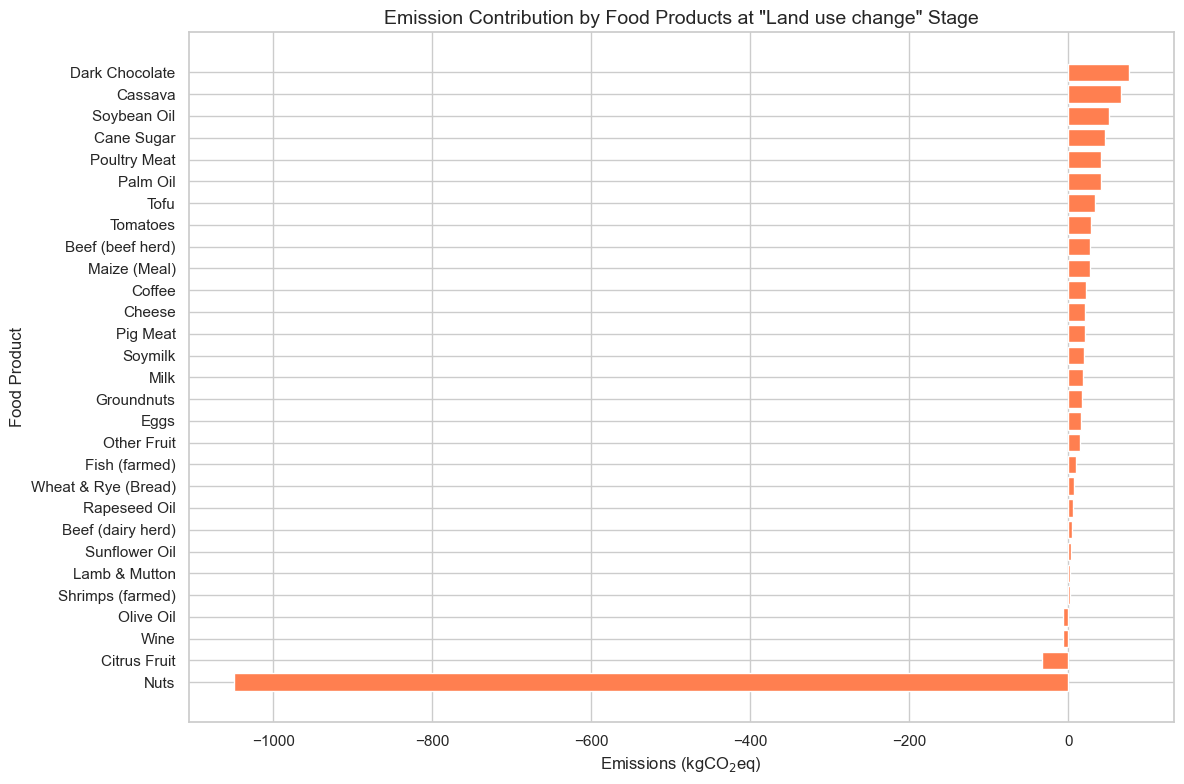

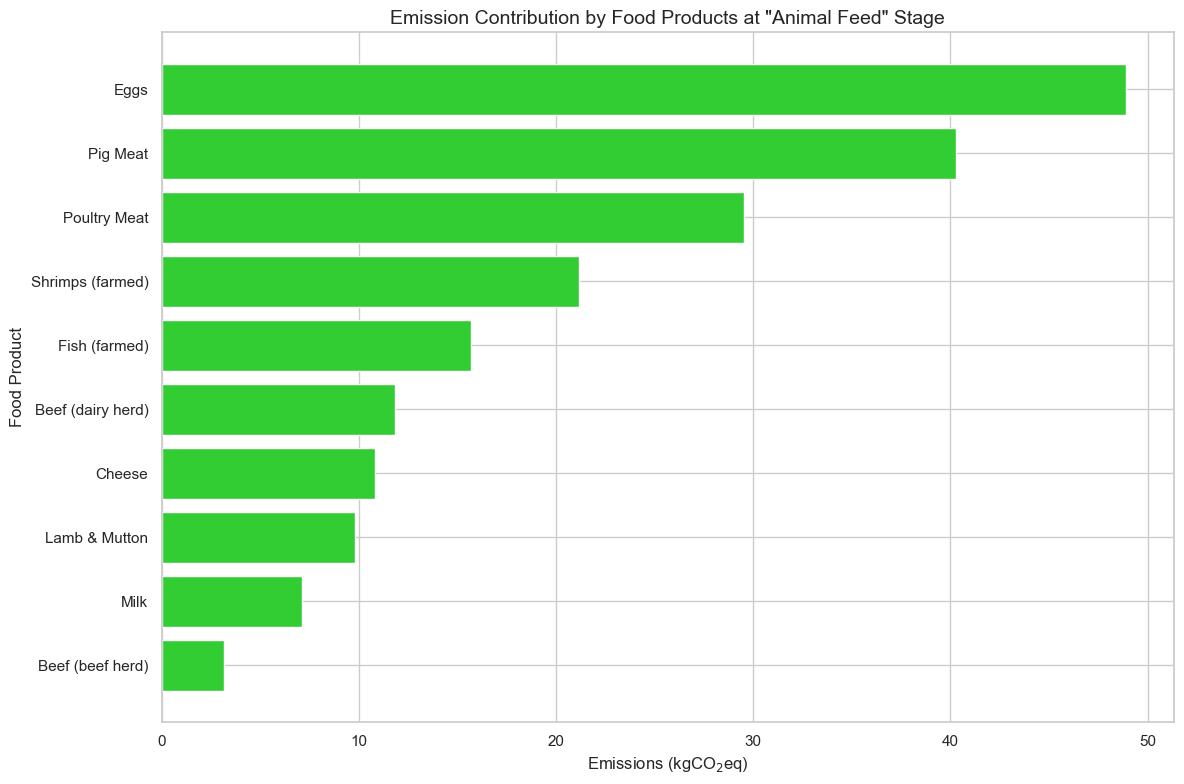

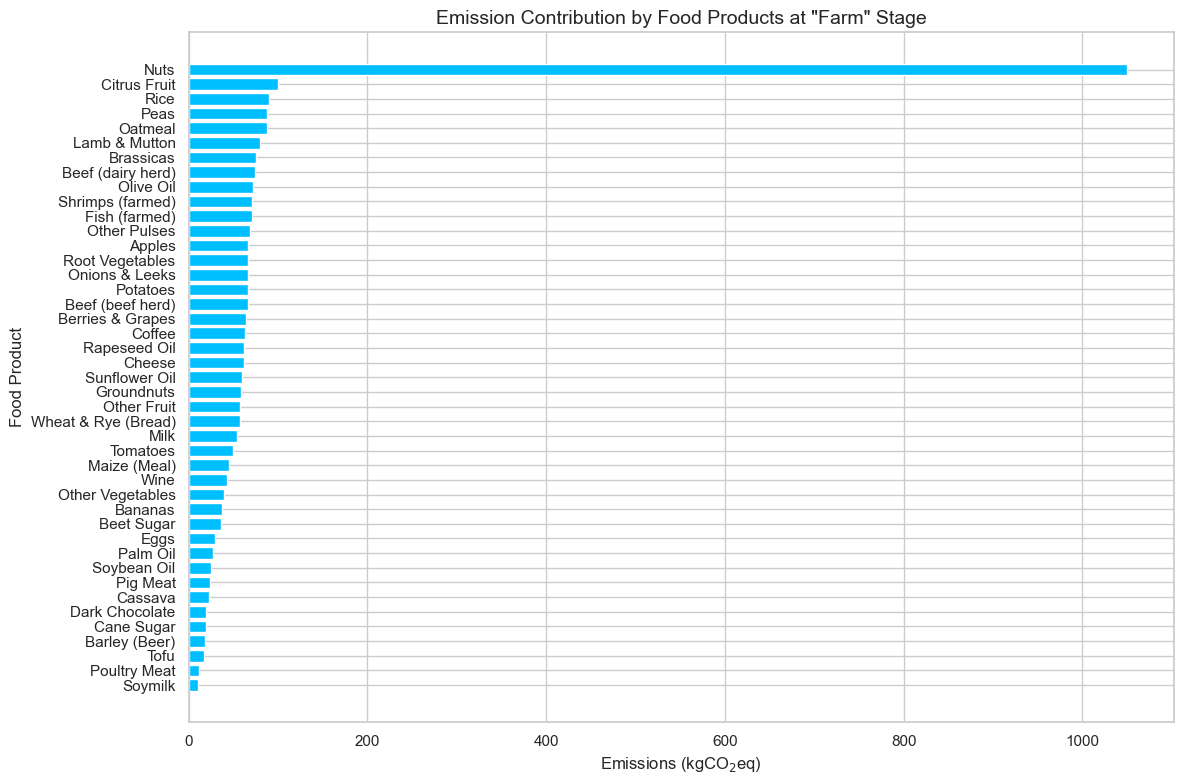

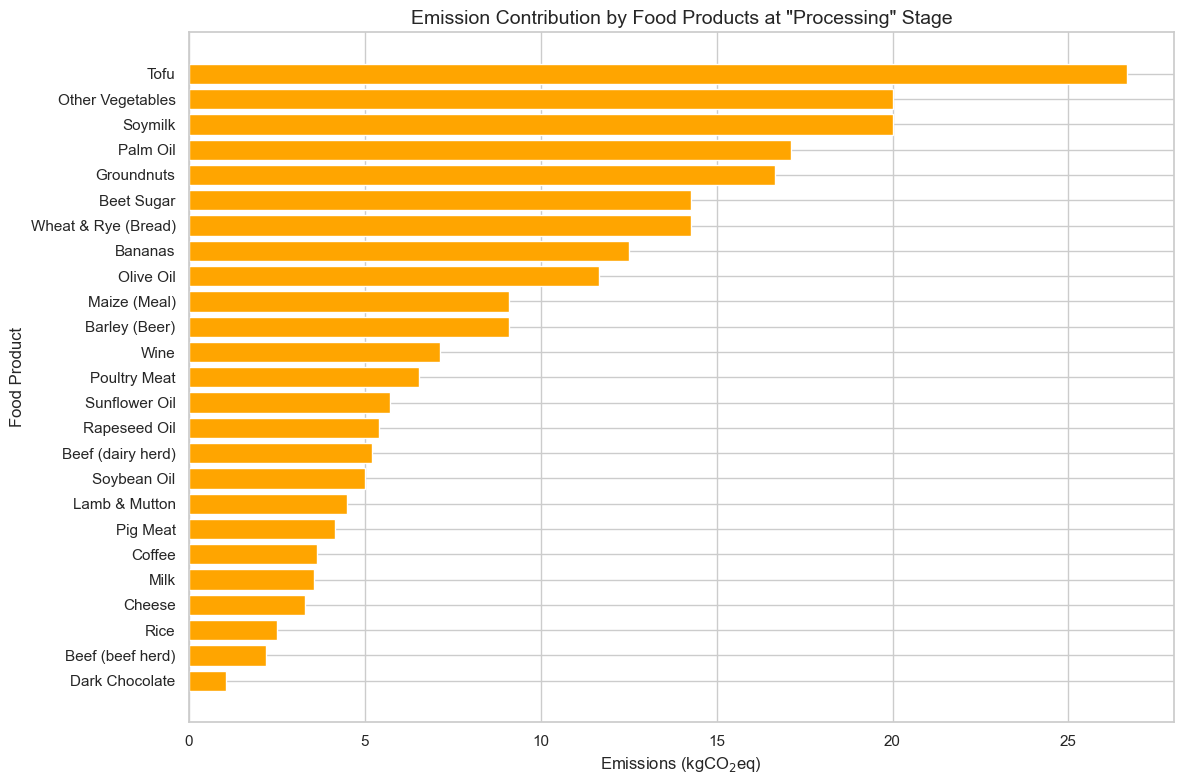

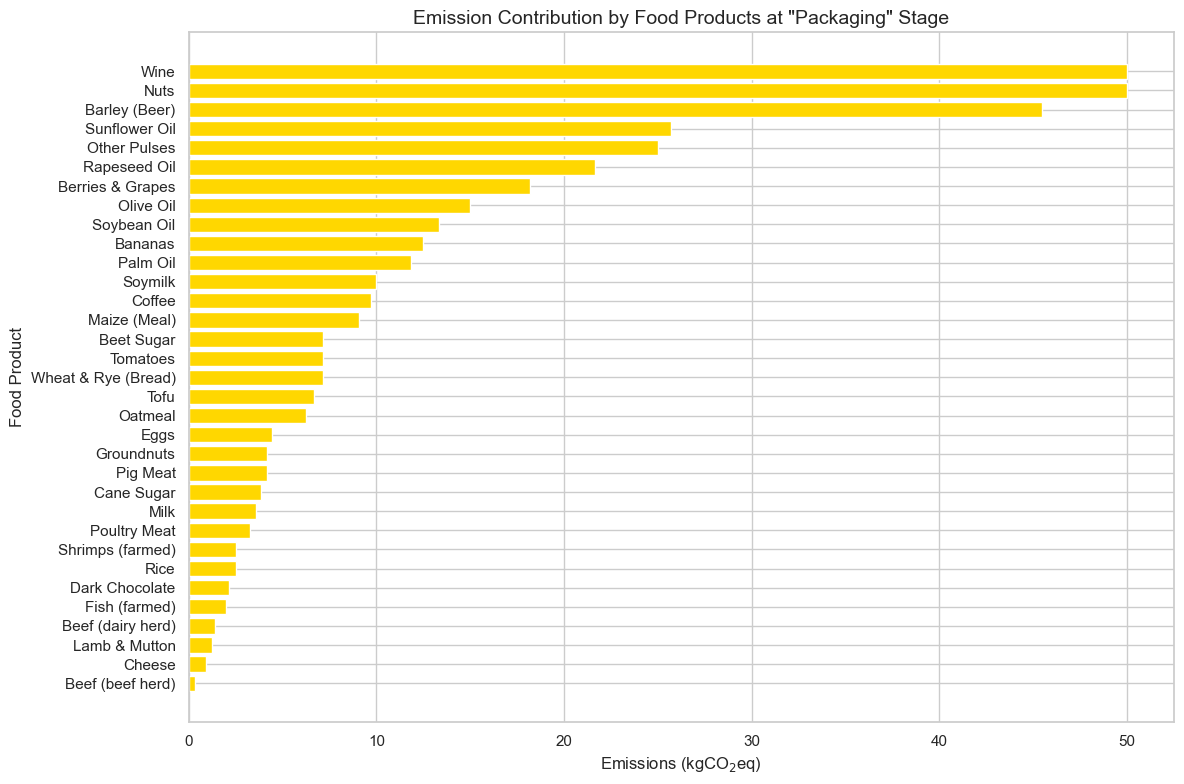

In [19]:
# Define a function to plot emissions for a given production stage, excluding zeros
def plot_stage_emissions(stage_name, color = 'skyblue'):
    # Filter out rows where emission is zero for the current stage
    stage_data = data_df[data_df[stage_name] != 0][['Food product', stage_name]].sort_values(by = stage_name, ascending = False)
    
    # Plotting
    plt.figure(figsize = (12, 8))
    plt.barh(stage_data['Food product'], stage_data[stage_name], color = color)
    plt.xlabel('Emissions (kgCO$_2$eq)', fontsize = 12)
    plt.ylabel('Food Product', fontsize = 12)
    plt.title(f'Emission Contribution by Food Products at "{stage_name}" Stage', fontsize = 14)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Loop through each stage and call the function
colors = ['coral', 'limegreen', 'deepskyblue', 'orange', 'purple', 'gold', 'slategray']
stages = ['Land use change', 'Animal Feed', 'Farm', 'Processing', 'Transport', 'Packaging', 'Retail']

for stage, color in zip(stages, colors):
    plot_stage_emissions(stage, color = color)

`Comment:`
  
- **Dark chocolate**, **cassava**, **soybean oil**, and **cane sugar** have the **highest positive emissions** from land use change. This is because a lot of forest or natural lands are being cleared to produce these foods.  
- **Animal products** like **beef** and **poultry** also show notable positive emissions, but less than certain crops like chocolate or soybean oil.
- Some foods, like **nuts** and **citrus fruits**, show **large negative emissions**. This suggests that their cultivation can **capture more carbon** than they release (carbon sequestration).
- **Processed products** like **tofu**, **cheese**, and **milk** have **smaller land use change emissions** compared to primary agricultural products.

In [20]:
# Filter and calculate average transport emissions by food group
group_emissions = (
    df[df['Transport'] != 0]
    .groupby('Food Group')['Transport']
    .mean()
    .sort_values(ascending = False)
    .reset_index()
)

# Plot the results
plt.figure(figsize = (12, 6))
sns.barplot(data = group_emissions, y = 'Food Group', x = 'Transport', color = 'teal')
plt.title('Transportation Emissions by Food Group', fontsize = 14)
plt.xlabel('Transport Emissions (kgCO$_2$eq)', fontsize = 12)
plt.ylabel('Food Group', fontsize = 12)
plt.tight_layout()
plt.show()

# Display resulting DataFrame
group_transport_df = group_emissions
group_transport_df

Food Group  Transport
0           Sugars & Sweeteners   0.700000
1                Meat & Poultry   0.360000
2                   Oils & Fats   0.280000
3                        Fruits   0.180000
4                       Seafood   0.150000
5                    Vegetables   0.140000
6                Legumes & Nuts   0.116667
7   Beverages & Processed Foods   0.100000
8             Grains & Starches   0.100000
9                         Dairy   0.100000
10                         Eggs   0.100000

`Comment:`

- Transportation Emissions are emissions from energy use in transporting raw and processed farm products. This includes fuel burnt by delivery trucks carrying finished, semi-finished and raw agricultural products.
- Among them all, sugar & sweeteners, meat & poultry and Oil & fats are the top 3 contributors.

>> ### 5.2 Eutrophying Emissions
>>  `Questions:`
>>  - Which food products have the highest eutrophication impact, and how does this relate to their production methods?

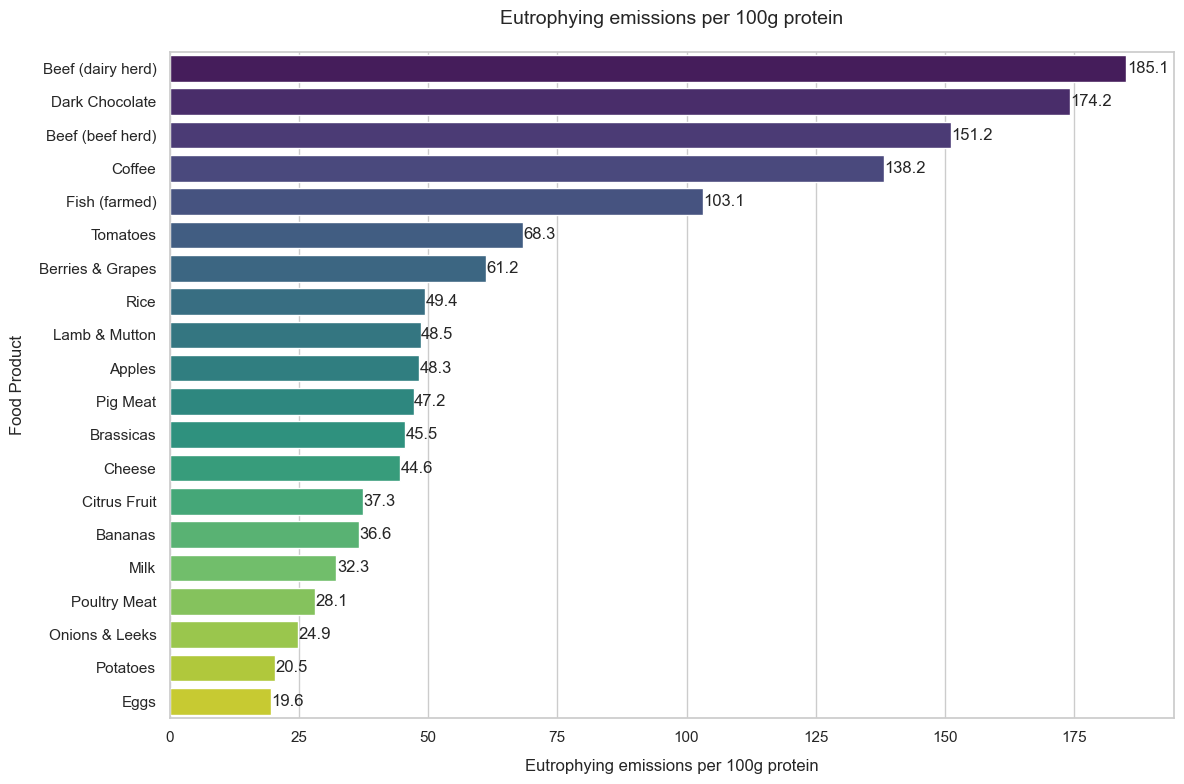

In [21]:
# Select the relevant columns
eutrophying_cols = [
    'Food product',
    'Eutrophying emissions per 1000kcal',
    'Eutrophying emissions per kilogram',
    'Eutrophying emissions per 100g protein'
]
eutrophying_df = df[eutrophying_cols]

# Create individual bar plots for each metric
for col in eutrophying_cols[1:]:
    plt.figure(figsize = (12, 8))
    
    # Sort values and select top 20 for better visualization
    sorted_df = eutrophying_df.sort_values(col, ascending = False).head(20)
    
    # Create bar plot
    ax = sns.barplot(data = sorted_df, 
                    x = col, 
                    y = 'Food product',
                    palette = 'viridis')
    
    # Customize plot
    plt.title(f'{col}', pad = 20, fontsize = 14)
    plt.xlabel(col, labelpad = 10)
    plt.ylabel('Food Product', labelpad = 10)
    plt.tight_layout()
    
    # Add value labels
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 0.1, 
                p.get_y() + p.get_height()/2., 
                f'{width:.1f}', 
                ha = 'left', 
                va = 'center')
    
    plt.show()

`Comment:`

Eutrophying emissions is the release of pollutants, primarily nitrogen (N) and phosphorus (P), into ecosystems, causing eutrophication. That is, excessive nutrient enrichment that disrupts natural balances.


- Beef production (both dairy and beef herds) has a high eutrophication impact because it requires large amounts of land, feed, and fertilisers, leading to heavy nutrient runoff into water bodies, a major cause of eutrophication.

- Similarly, farmed fish are raised in concentrated aquatic systems where uneaten food and waste products release nitrogen and phosphorus directly into surrounding waters, intensifying water pollution.

- Among plant-based products, coffee and dark chocolate also show high eutrophication impacts. Coffee cultivation often involves clearing land and heavy fertiliser use, especially in tropical regions where rainfall can easily carry nutrients into rivers and lakes.

- Dark chocolate, sourced from cocoa farming, faces similar issues with fertiliser use and land management practices that contribute to nutrient runoff.

>> ### 5.3 Freshwater withdrawals

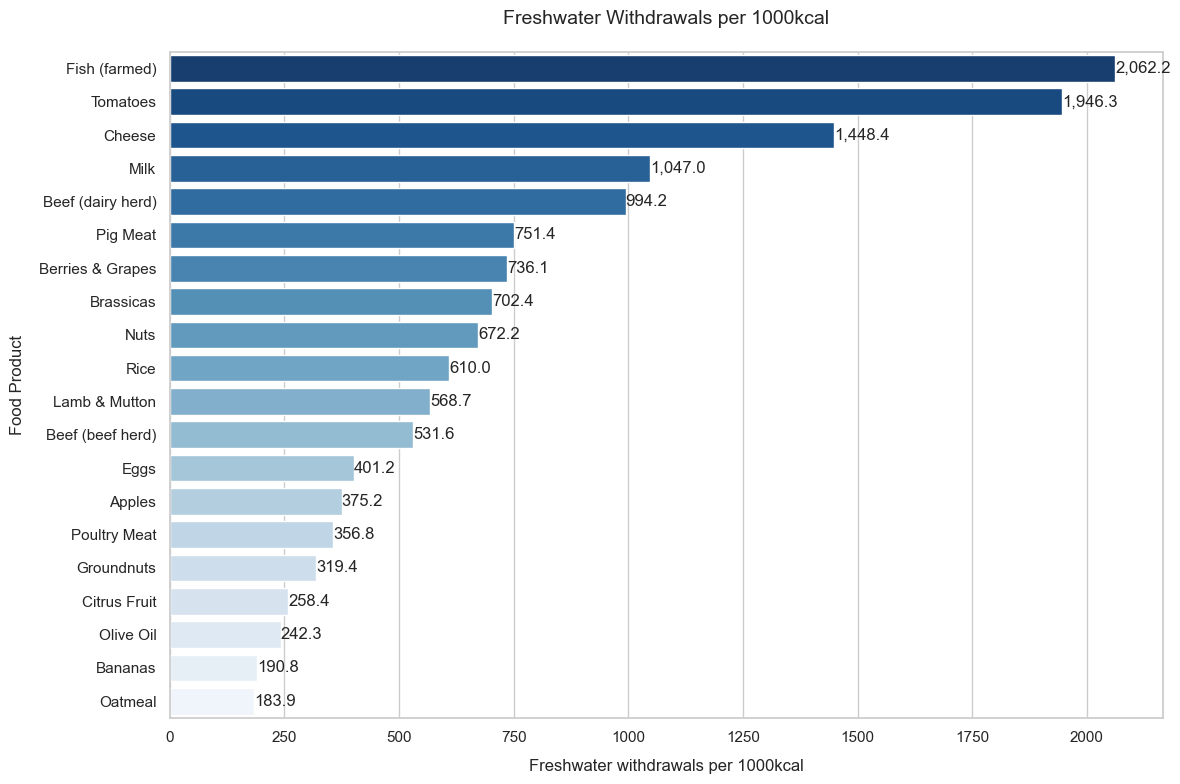

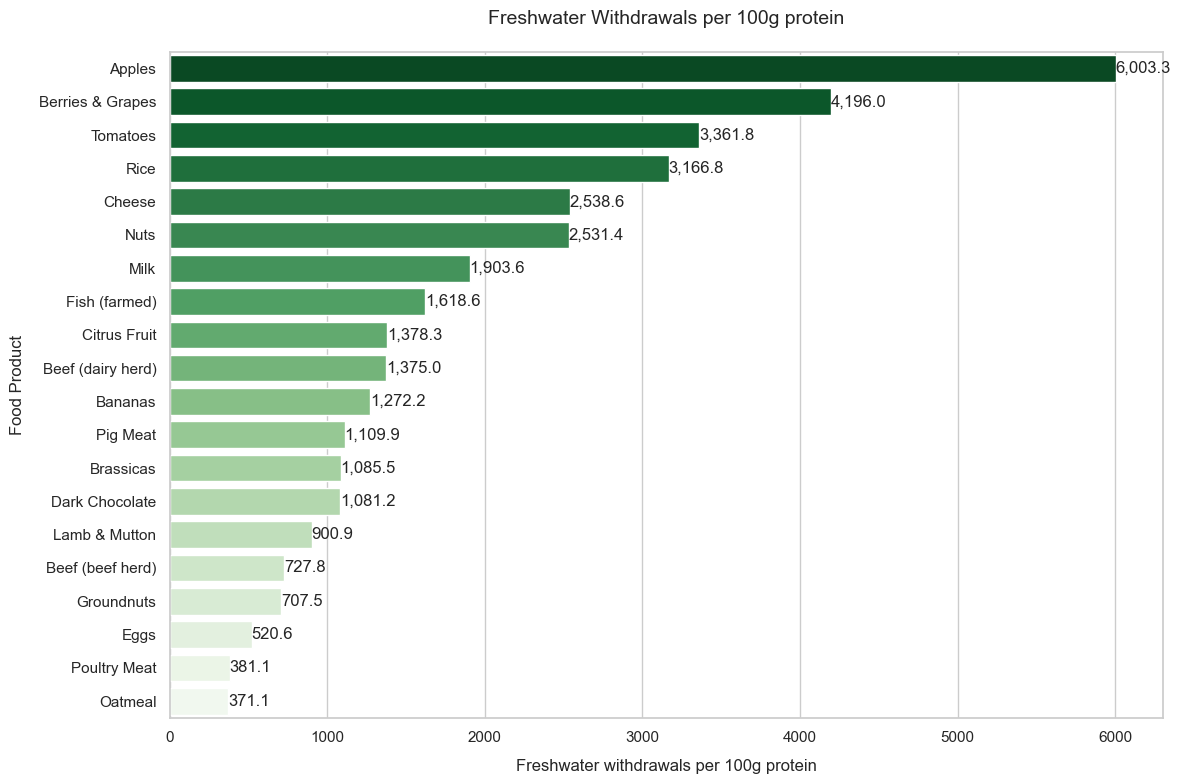

In [22]:
# Select the relevant columns
freshwater_cols = [
    'Food product',
    'Freshwater withdrawals per 1000kcal',
    'Freshwater withdrawals per 100g protein',
    'Freshwater withdrawals per kilogram'
]
freshwater_df = df[freshwater_cols]

# Visualization function
def plot_freshwater_metric(metric, title_suffix, palette = 'viridis', figsize = (12, 8)):
    sorted_df = freshwater_df.sort_values(metric, ascending = False).head(20)
    plt.figure(figsize = figsize)
    ax = sns.barplot(data = sorted_df, x = metric, y = 'Food product', palette = palette)
    plt.title(f'Freshwater Withdrawals {title_suffix}', pad = 20, fontsize = 14)
    plt.xlabel(metric, labelpad = 10)
    plt.ylabel('Food Product', labelpad = 10)
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 0.1, p.get_y() + p.get_height()/2., f'{width:,.1f}', ha = 'left', va = 'center')
    plt.tight_layout()
    plt.show()

# Calling the function for each metric
plot_freshwater_metric(
    'Freshwater withdrawals per 1000kcal',
    'per 1000kcal',
    'Blues_r'
)

plot_freshwater_metric(
    'Freshwater withdrawals per kilogram',
    'per kilogram',
    'Oranges_r'
)

plot_freshwater_metric(
    'Freshwater withdrawals per 100g protein',
    'per 100g protein',
    'Greens_r'
)

>> ### 5.3 Greenhouse Gas Emissions

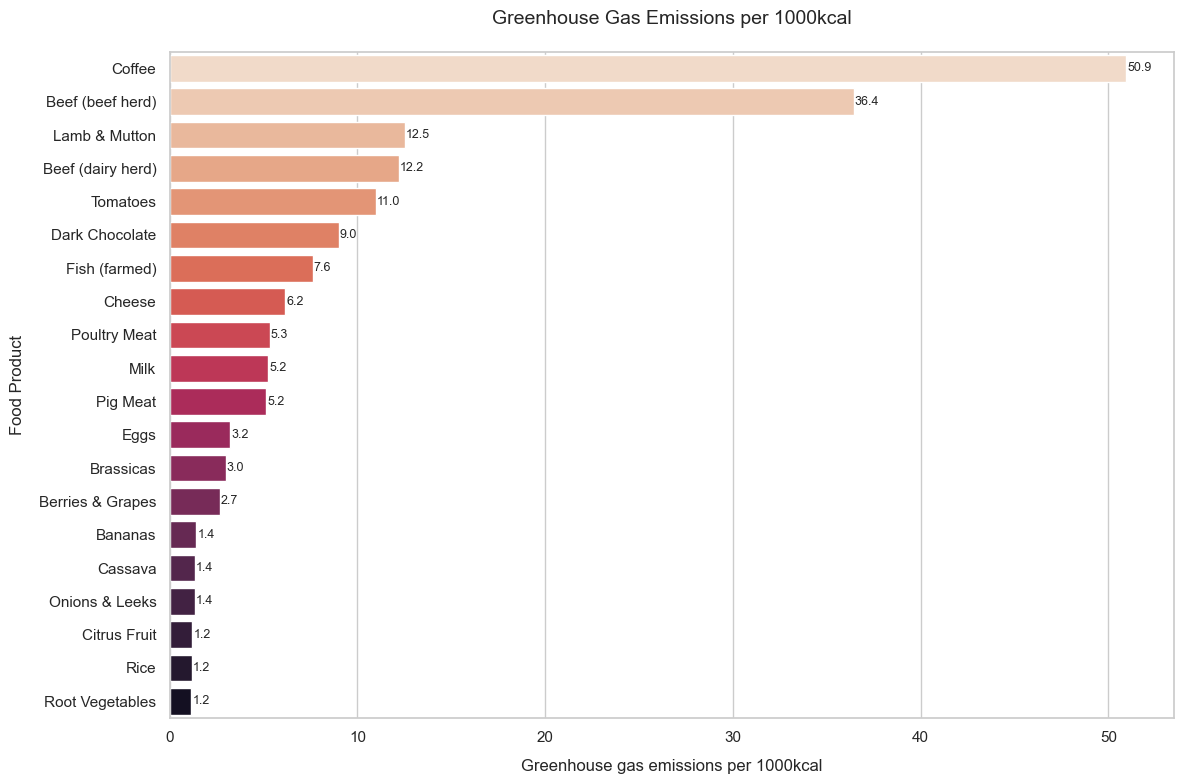

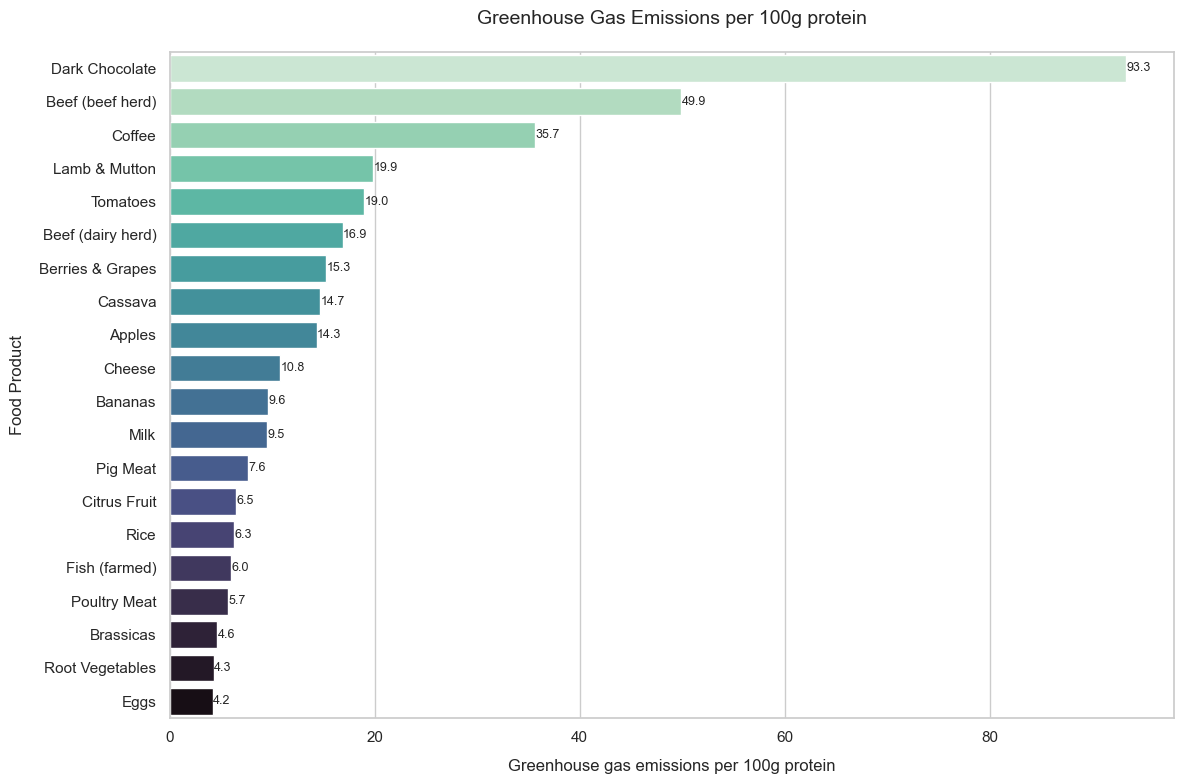

In [23]:
# Select greenhouse gas emissions columns
ghg_cols = [
    'Food product',
    'Greenhouse gas emissions per 1000kcal',
    'Greenhouse gas emissions per 100g protein'
]

ghg_df = df[ghg_cols]

# Visualization function
def plot_ghg_metric(metric, title_suffix, palette = 'rocket', figsize = (12, 8)):
    sorted_df = ghg_df.sort_values(metric, ascending = False).head(20)
    plt.figure(figsize = figsize)
    ax = sns.barplot(data = sorted_df, 
                    x = metric,
                    y = 'Food product',
                    palette = palette)
    
    plt.title(f'Greenhouse Gas Emissions {title_suffix}', pad = 20, fontsize = 14)
    plt.xlabel(metric, labelpad = 10)
    plt.ylabel('Food Product', labelpad = 10)
    
    # Add value labels
    for p in ax.patches:
        width = p.get_width()
        plt.text(width + 0.05, 
                p.get_y() + p.get_height()/2., 
                f'{width:.1f}', 
                ha = 'left', 
                va = 'center',
                fontsize = 9)
    
    plt.tight_layout()
    plt.show()

# Calling the function for each metric
plot_ghg_metric(
    'Greenhouse gas emissions per 1000kcal',
    'per 1000kcal',
    'rocket_r'
)

plot_ghg_metric(
    'Greenhouse gas emissions per 100g protein',
    'per 100g protein',
    'mako_r'
)

>> ### 5.4 Land Use

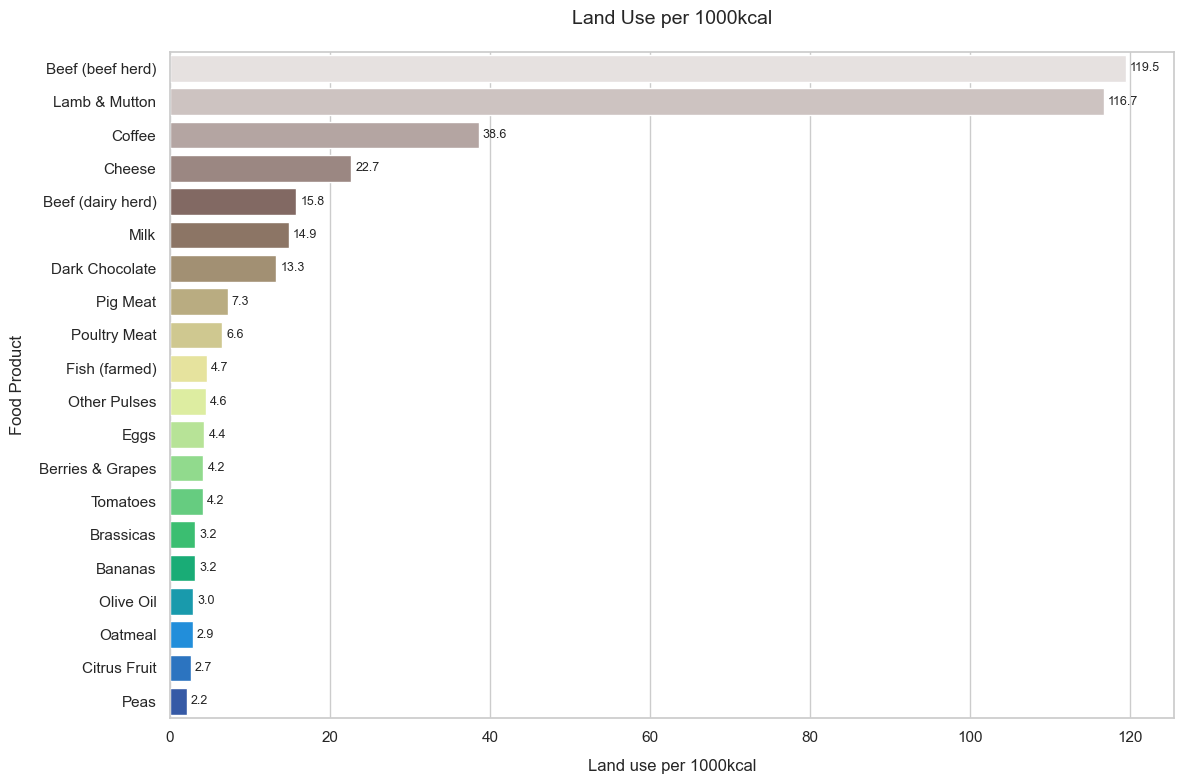

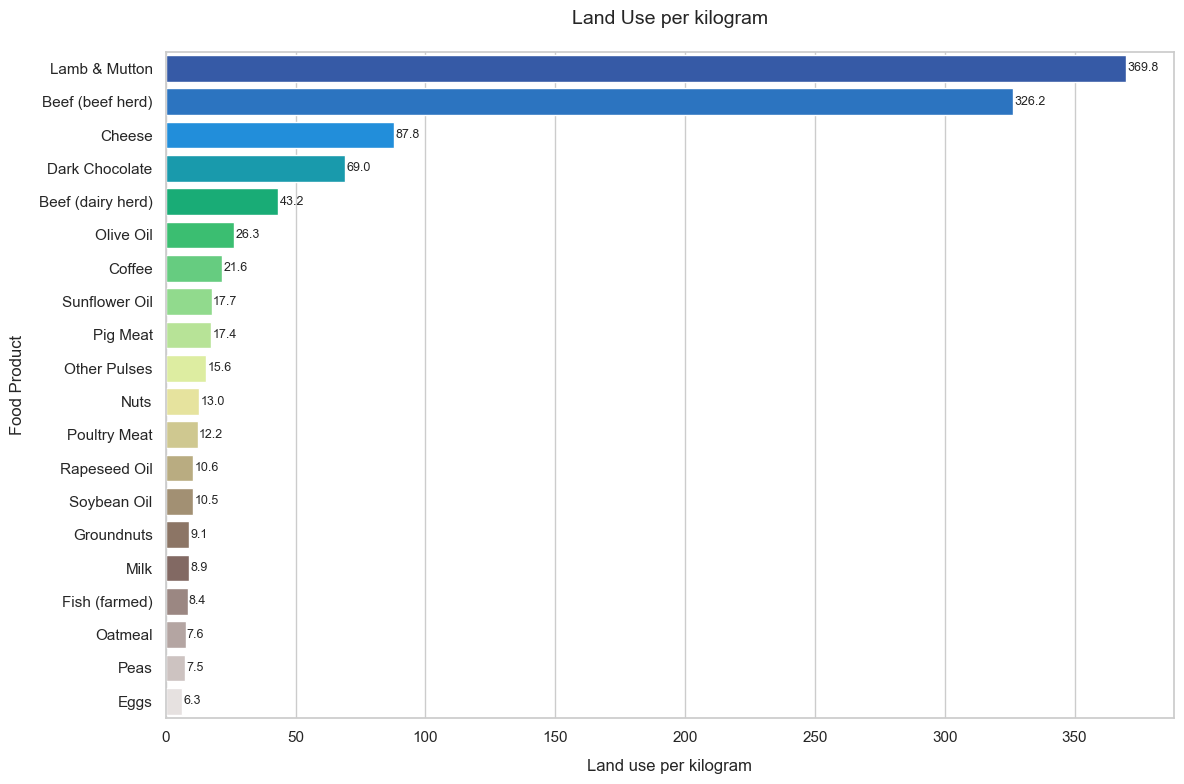

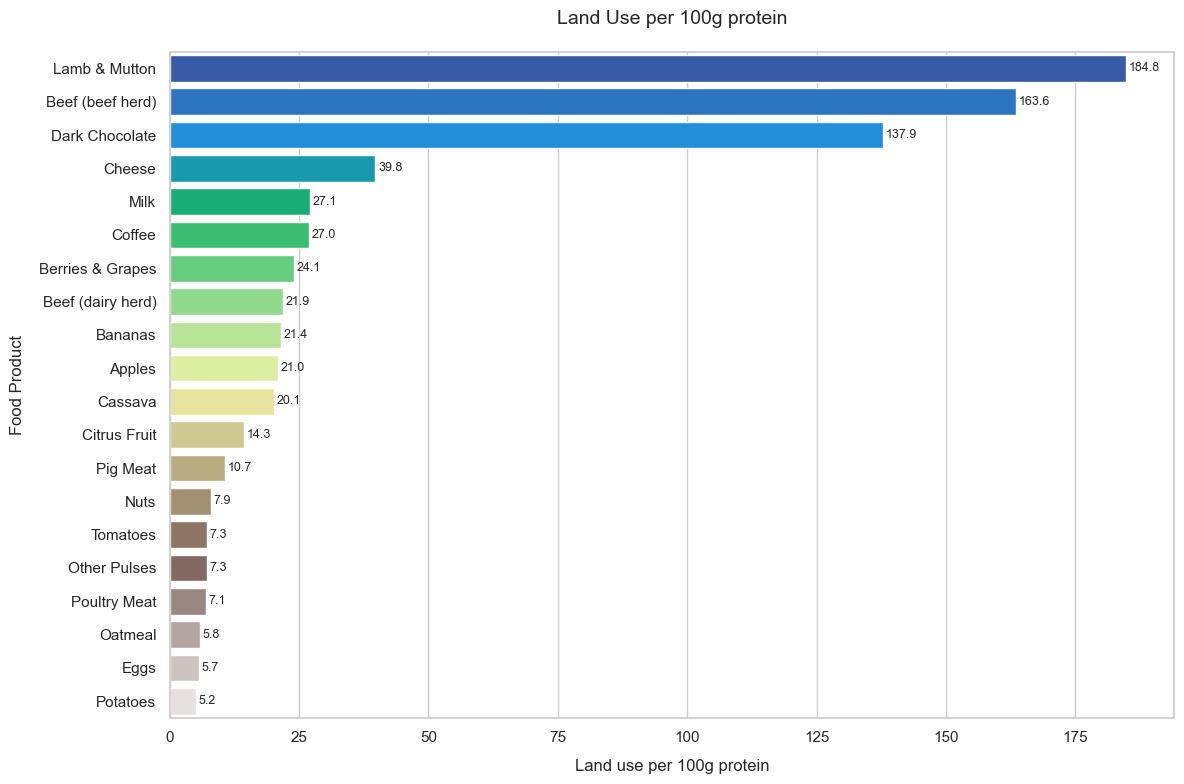

In [24]:
# Select land use columns
land_use_cols = [
    'Food product',
    'Land use per 1000kcal',
    'Land use per 100g protein',
    'Land use per kilogram'
]

# Create land use dataframe
land_use_df = df[land_use_cols]

# Function for visualization
def plot_land_use(metric, title_suffix, palette = 'terrain', figsize = (12, 8)):
    # Sort and select top 20
    sorted_df = land_use_df.sort_values(metric, ascending = False).head(20)
    
    plt.figure(figsize = figsize)
    ax = sns.barplot(data = sorted_df,
                    x = metric,
                    y = 'Food product',
                    palette = palette)
    
    # Customizations
    title = f'Land Use {title_suffix}'
    plt.title(title, pad = 20, fontsize = 14)
    plt.xlabel(metric, labelpad = 10)
    plt.ylabel('Food Product', labelpad = 10)
    
    # Add value labels
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 0.5,
               p.get_y() + p.get_height()/2.,
               f'{width:,.1f}',
               ha = 'left', 
               va = 'center',
               fontsize = 9)
    
    plt.tight_layout()
    plt.show()

# Calling the function for each metric
plot_land_use(
    'Land use per 1000kcal',
    'per 1000kcal',
    'terrain_r'
)

plot_land_use(
    'Land use per kilogram',
    'per kilogram',
    'terrain'
)

plot_land_use(
    'Land use per 100g protein',
    'per 100g protein',
    'terrain'
)

>> ### 5.5 Scarcity-Weighted Water Use
>>  `Questions:`
>>  - What is the correlation between water usage and carbon emissions across different food categories?

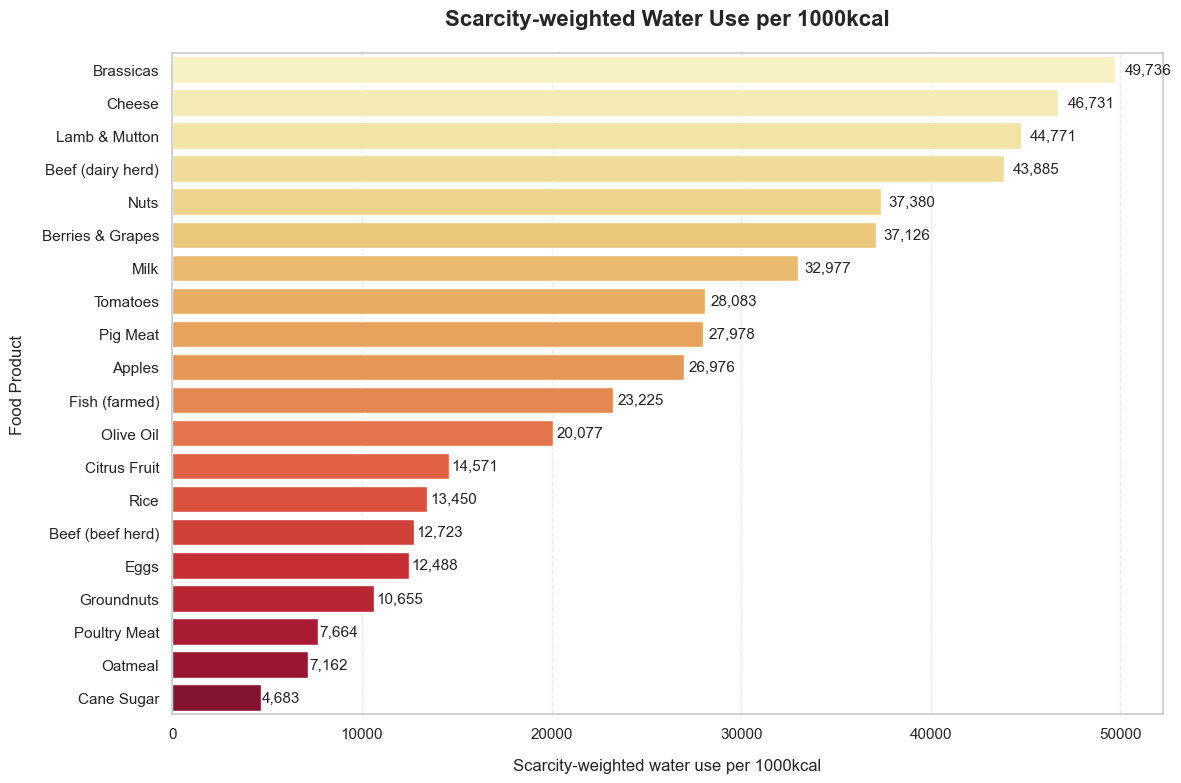

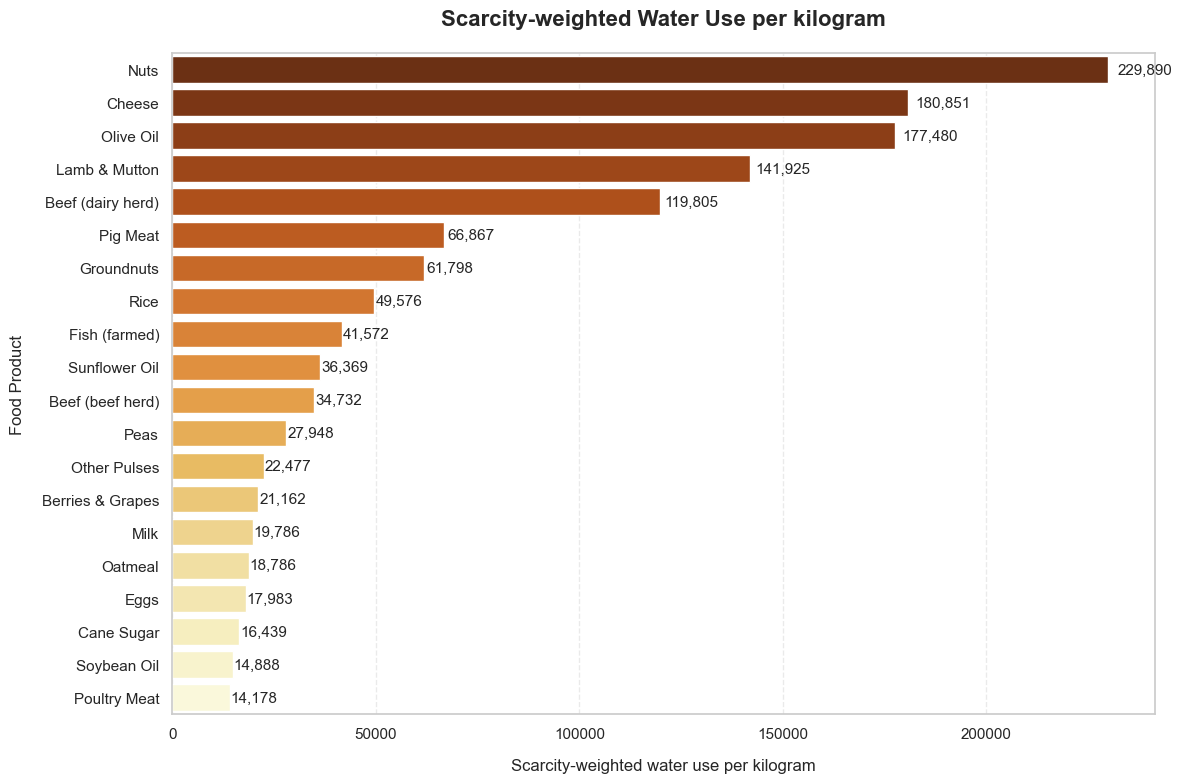

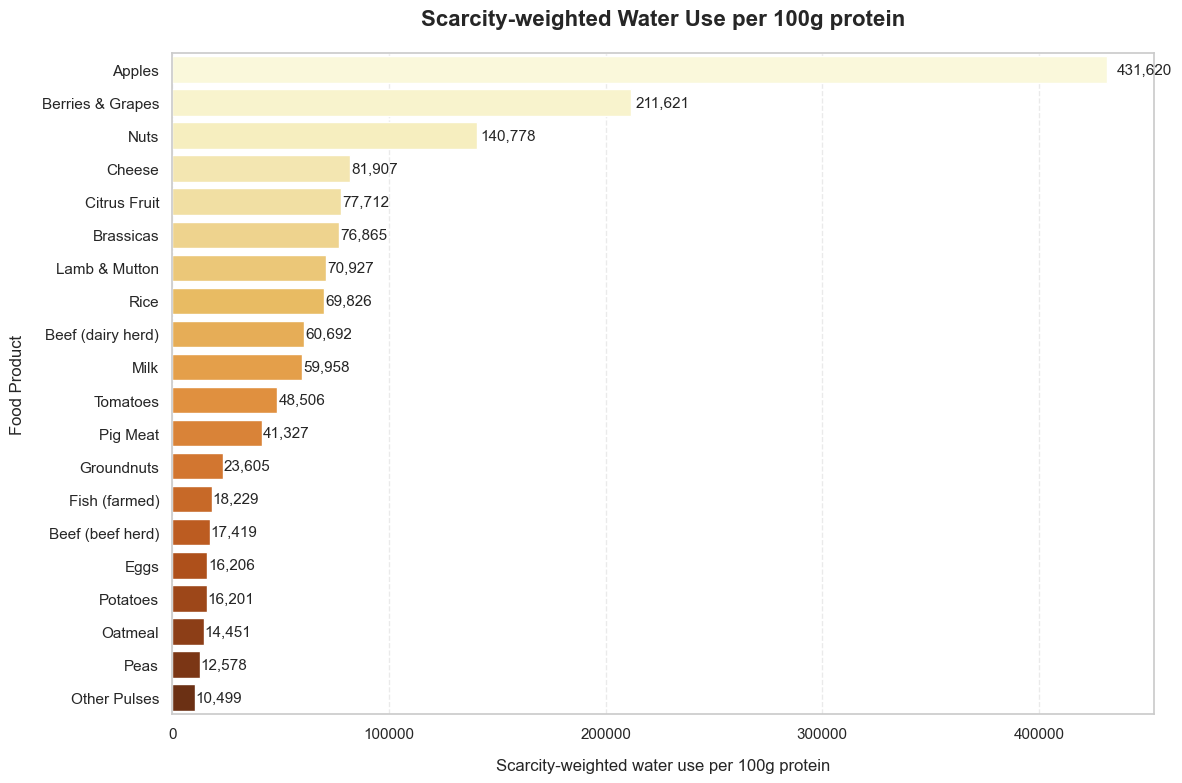

In [25]:
# Select scarcity-weighted water use columns
scarcity_cols = [
    'Food product',
    'Scarcity-weighted water use per kilogram',
    'Scarcity-weighted water use per 100g protein',
    'Scarcity-weighted water use per 1000kcal'
]

scarcity_df = df[scarcity_cols]

# Visualization Function
def plot_scarcity_water(metric, title_suffix, palette = 'YlOrBr', figsize = (12, 8)):
    # Sort and select top 20
    sorted_df = scarcity_df.sort_values(metric, ascending = False).head(20)
    
    plt.figure(figsize = figsize)
    ax = sns.barplot(data = sorted_df,
                    x = metric,
                    y = 'Food product',
                    palette = palette)
    
    # Customizations
    title = f'Scarcity-weighted Water Use {title_suffix}'
    plt.title(title, pad = 20, fontsize = 16, weight = 'bold')
    plt.xlabel(metric, labelpad = 12, fontsize = 12)
    plt.ylabel('Food Product', labelpad = 12, fontsize = 12)
    
    # Add value labels with thousands separators
    for p in ax.patches:
        width = p.get_width()
        ax.text(width * 1.01,
               p.get_y() + p.get_height()/2.,
               f'{width:,.0f}',
               ha = 'left', 
               va = 'center',
               fontsize = 11)
    
    plt.grid(axis = 'x', linestyle = '--', alpha = 0.4)
    plt.tight_layout()
    plt.show()

# Calling the function for each metric
plot_scarcity_water(
    'Scarcity-weighted water use per 1000kcal',
    'per 1000kcal',
    'YlOrRd'
)

plot_scarcity_water(
    'Scarcity-weighted water use per kilogram',
    'per kilogram',
    'YlOrBr_r'
)

plot_scarcity_water(
    'Scarcity-weighted water use per 100g protein',
    'per 100g protein',
    'YlOrBr'
)

>> ### 5.6 Environmental Impact
>>  `Questions:`
>>  - How do animal-based and plant-based foods compare in terms of total carbon footprint and resource consumption?
>>  - What are the most environmentally efficient foods in terms of resource utilization per kg of production?
>>  - Which stage of food production (i.e. farming, transportation, processing, etc) contributes the most to environmental impact?

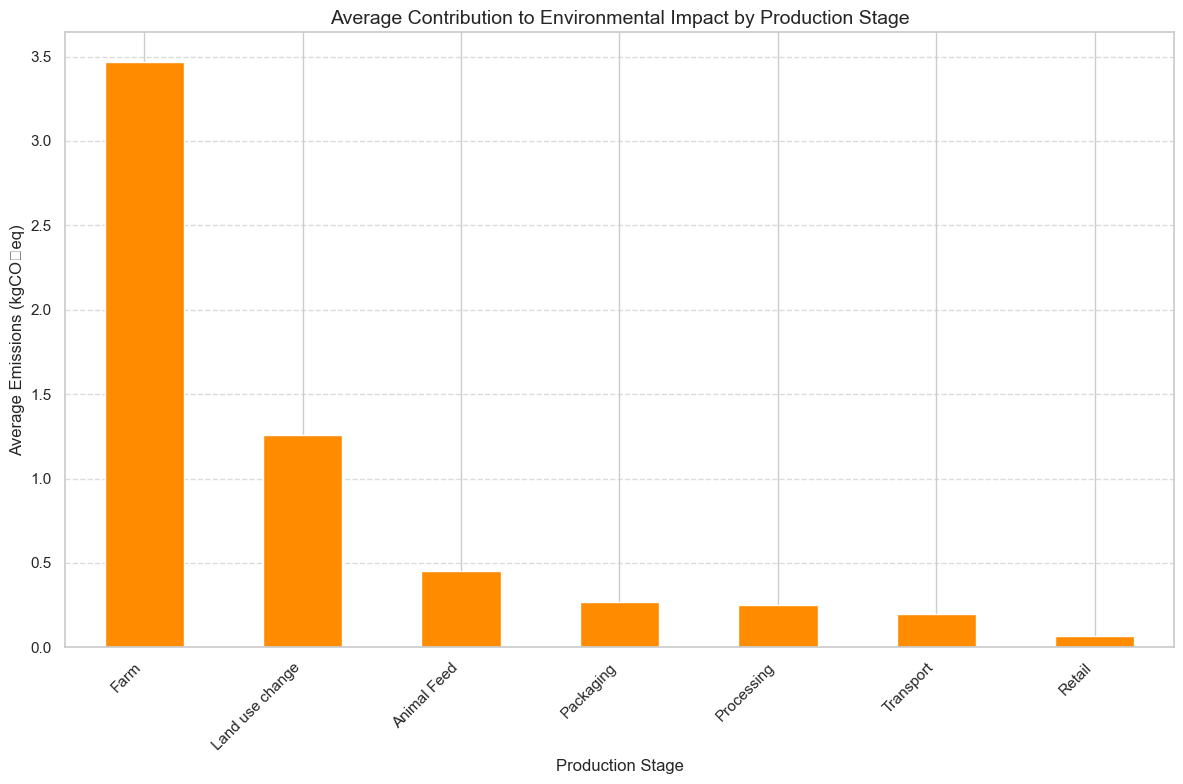

In [26]:
# Which stage contributes most to environmental impact?
# Calculate the mean contribution of each stage across all food products
stage_columns = ['Land use change', 'Animal Feed', 'Farm', 'Processing', 
                 'Transport', 'Packaging', 'Retail']
stage_means = df[stage_columns].mean()

# Plot the contribution of each stage
plt.figure(figsize = (12, 8))
stage_means.sort_values(ascending = False).plot(kind = 'bar', color = 'darkorange')
plt.title('Average Contribution to Environmental Impact by Production Stage', fontsize = 14)
plt.ylabel('Average Emissions (kgCO₂eq)', fontsize = 12)
plt.xlabel('Production Stage', fontsize = 12)
plt.xticks(rotation=45, ha = 'right')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

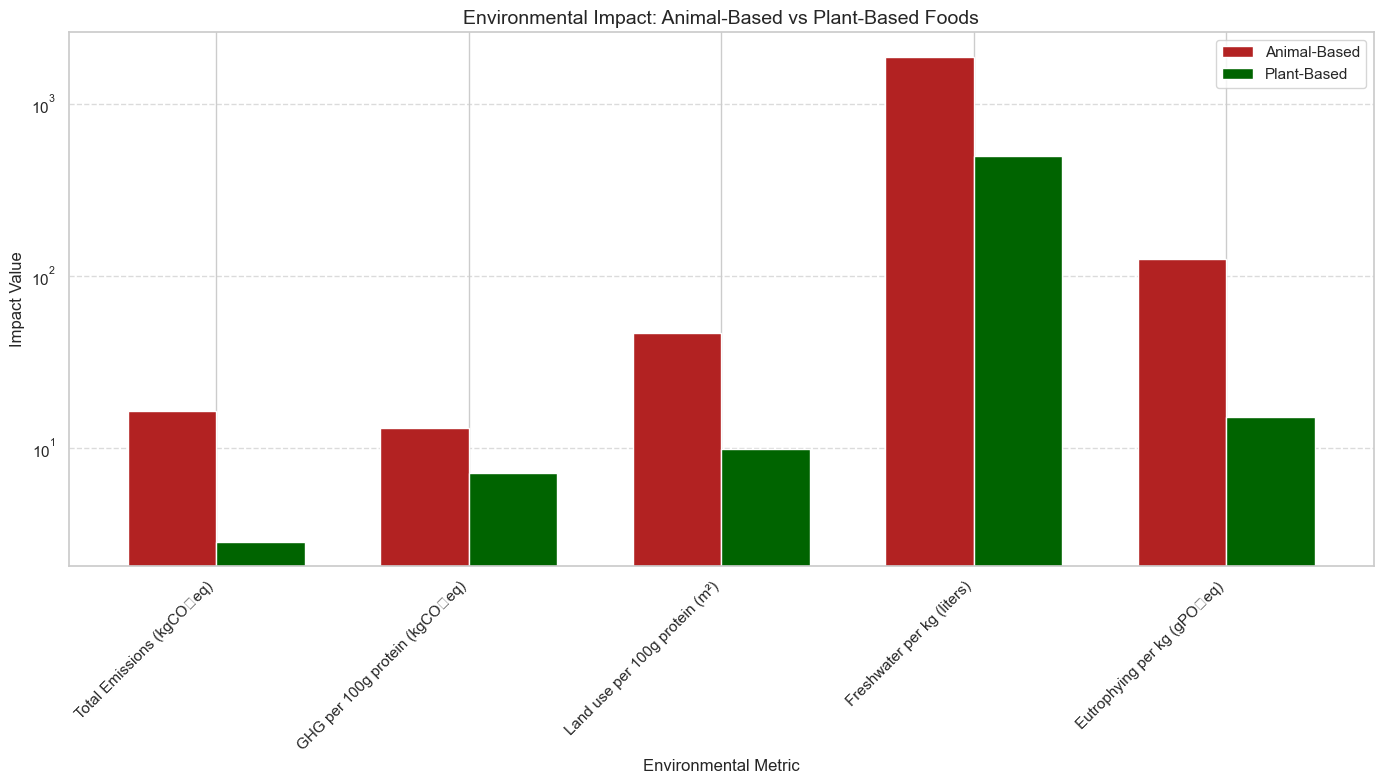


=== Most Impactful Production Stage ===
Farm: 3.5 kgCO₂eq average emissions

=== Animal vs Plant-Based Comparison ===
                        Metric  Animal-Based  Plant-Based  Animal:Plant Ratio
     Total Emissions (kgCO₂eq)     16.390000     2.815152            5.822067
GHG per 100g protein (kgCO₂eq)     13.041652     7.113816            1.833285
Land use per 100g protein (m²)     46.431751     9.742988            4.765658
    Freshwater per kg (liters)   1892.650000   500.378788            3.782435
   Eutrophying per kg (gPO₄eq)    125.481000    15.107879            8.305666


In [27]:
# Compare animal-based vs plant-based foods
# Define animal-based and plant-based food lists
animal_based = [
    'Beef (beef herd)', 'Beef (dairy herd)', 'Lamb & Mutton',
    'Pig Meat', 'Poultry Meat', 'Milk', 'Cheese', 'Eggs',
    'Fish (farmed)', 'Shrimps (farmed)'
]

plant_based = [col for col in df['Food product'] if col not in animal_based]


# Filter dataframes
animal_df = df[df['Food product'].isin(animal_based)]
plant_df = df[df['Food product'].isin(plant_based)]

# Calculate comparison metrics
comparison_data = {
    'Metric': [
        'Total Emissions (kgCO₂eq)',
        'GHG per 100g protein (kgCO₂eq)',
        'Land use per 100g protein (m²)',
        'Freshwater per kg (liters)',
        'Eutrophying per kg (gPO₄eq)'
    ],
    'Animal_Columns': [
        'Total_emissions',
        'Greenhouse gas emissions per 100g protein',
        'Land use per 100g protein',
        'Freshwater withdrawals per kilogram',
        'Eutrophying emissions per kilogram'
    ],
    'Plant_Columns': [
        'Total_emissions',
        'Greenhouse gas emissions per 100g protein',
        'Land use per 100g protein',
        'Freshwater withdrawals per kilogram',
        'Eutrophying emissions per kilogram'
    ]
}


# Calculate means
results = []
for metric, animal_col, plant_col in zip(comparison_data['Metric'], 
                                        comparison_data['Animal_Columns'], 
                                        comparison_data['Plant_Columns']):
    animal_mean = animal_df[animal_col].mean()
    plant_mean = plant_df[plant_col].mean()
    ratio = animal_mean / plant_mean
    results.append({
        'Metric': metric,
        'Animal-Based': animal_mean,
        'Plant-Based': plant_mean,
        'Animal:Plant Ratio': ratio
    })

results_df = pd.DataFrame(results)


# Plot the comparison
plt.figure(figsize = (14, 8))
x = range(len(results_df))
width = 0.35

plt.bar(x, results_df['Animal-Based'], width, label = 'Animal-Based', color = 'firebrick')
plt.bar([i + width for i in x], results_df['Plant-Based'], width, label = 'Plant-Based', color = 'darkgreen')

plt.xlabel('Environmental Metric', fontsize = 12)
plt.ylabel('Impact Value', fontsize = 12)
plt.title('Environmental Impact: Animal-Based vs Plant-Based Foods', fontsize = 14)
plt.xticks([i + width/2 for i in x], results_df['Metric'], rotation = 45, ha = 'right')
plt.yscale('log')
plt.legend()
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

# Print results
print('\n=== Most Impactful Production Stage ===')
print(f"{stage_means.idxmax()}: {stage_means.max():.1f} kgCO₂eq average emissions\n")

print('=== Animal vs Plant-Based Comparison ===')
print(results_df.to_string(index = False))

`Comment:`

- Animal-based foods such as beef, lamb, cheese have significantly higher total emissions (e.g., beef herd: 59.6 kgCO₂eq/kg) compared to plant-based foods (e.g., wheat: 1.4 kgCO₂eq/kg).
- Top emitters are Beef (beef herd: 59.6), lamb (24.5), cheese (21.2) while low emitters are Peas (0.8), bananas (0.8), potatoes (0.3) etc.

- In terms of resource consumption, Beef requires 326.21 m²/kg of land use, while plant-based foods like potatoes requires 0.88 m²/kg.
- Again, Beef (dairy herd) consumes 2714.3 liters/kg of water, whereas peas use 396.6 liters/kg.

In [28]:
# Select all per-kilogram metrics
kg_metrics = [
    'Total_emissions',
    'Land use per kilogram',
    'Freshwater withdrawals per kilogram',
    'Scarcity-weighted water use per kilogram',
    'Eutrophying emissions per kilogram'
]

# Clean metric names for display
clean_names = {
    'Total_emissions': 'GHG Emissions (kgCO₂eq)',
    'Land use per kilogram': 'Land Use (m²)',
    'Freshwater withdrawals per kilogram': 'Water Use (L)',
    'Scarcity-weighted water use per kilogram': 'Scarcity-Weighted Water (L)',
    'Eutrophying emissions per kilogram': 'Eutrophication (gPO₄eq)'
}

# Create correlation dataframe
corr_df = df[['Food product'] + kg_metrics]

corr_df.head()

Food product  Total_emissions  Land use per kilogram  \
0  Wheat & Rye (Bread)              1.4                    0.0   
1         Maize (Meal)              1.1                    0.0   
2        Barley (Beer)              1.1                    0.0   
3              Oatmeal              1.6                    7.6   
4                 Rice              4.0                    2.8   

   Freshwater withdrawals per kilogram  \
0                                  0.0   
1                                  0.0   
2                                  0.0   
3                                482.4   
4                               2248.4   

   Scarcity-weighted water use per kilogram  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                   18786.2   
4                                   49576.3   

   Eutrophying emissions per kilogram  
0                                0.00  
1                                0.00  
2                                0.00  
3                               11.23  
4                               35.07

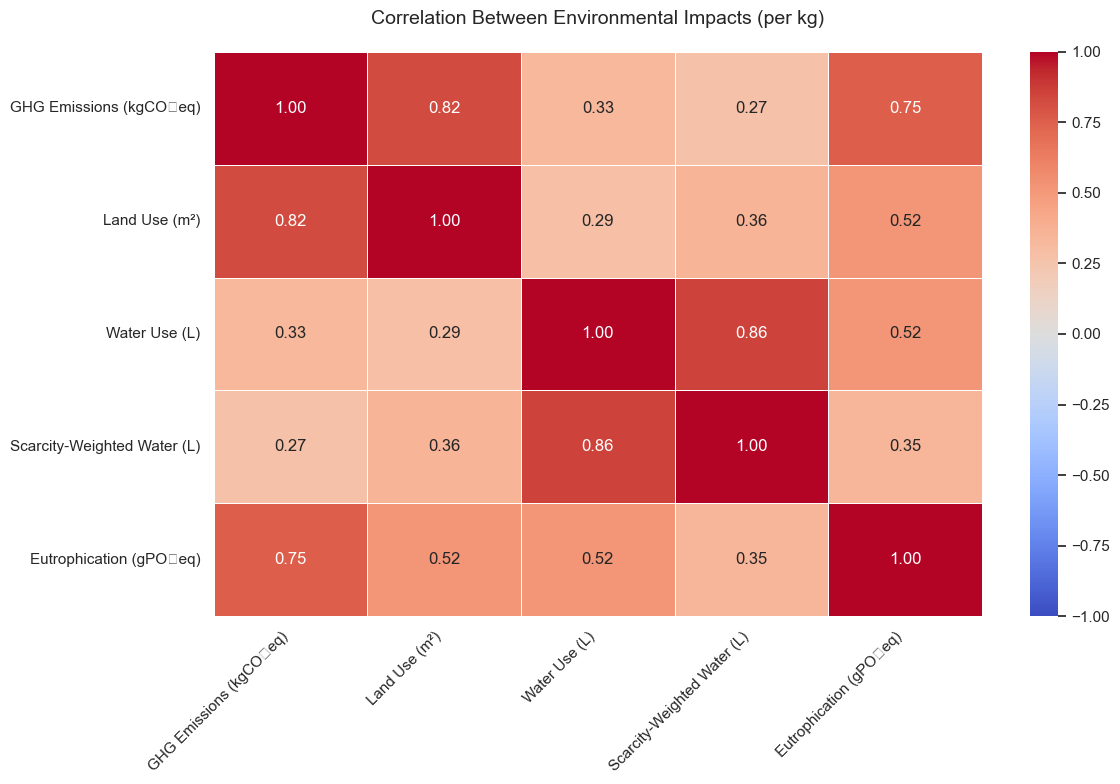

In [29]:
plt.figure(figsize = (12, 8))

# Calculate correlations
corr_matrix = corr_df[kg_metrics].corr()

# Create heatmap with values
sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'coolwarm', 
            vmin = -1, 
            vmax = 1,
            fmt = ".2f",
            linewidths = 0.5,
            annot_kws = {"size": 12},
            xticklabels = [clean_names[x] for x in kg_metrics],
            yticklabels = [clean_names[x] for x in kg_metrics])

plt.title('Correlation Between Environmental Impacts (per kg)', pad = 20, fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

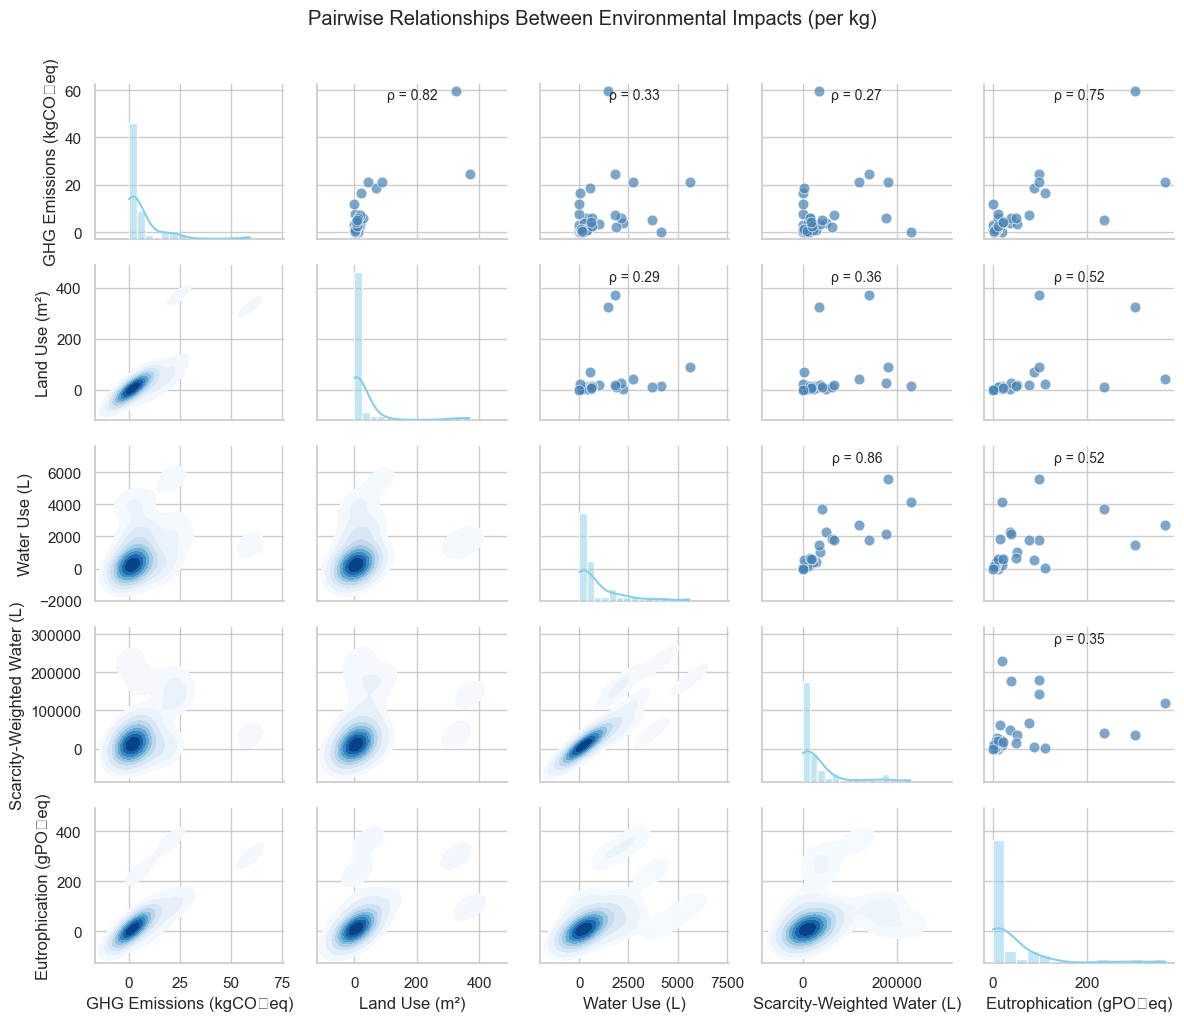

In [30]:
# Create pairgrid
g = sns.PairGrid(corr_df[kg_metrics].rename(columns = clean_names),
                height = 2,
                aspect = 1.2)

# Upper triangle - scatter plots
g.map_upper(sns.scatterplot, 
            alpha = 0.7, 
            s = 60,
            color = 'steelblue')

# Diagonal - histograms
g.map_diag(sns.histplot, 
           color = 'skyblue', 
           kde = True,
           bins = 15)

# Lower triangle - density plots
g.map_lower(sns.kdeplot, 
            cmap = 'Blues',
            fill = True)

# Add correlation coefficients
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    x = kg_metrics[j]
    y = kg_metrics[i]
    corr = pearsonr(corr_df[x], corr_df[y])[0]
    g.axes[i,j].annotate(f"ρ = {corr:.2f}", 
                        xy = (0.5, 0.9), 
                        xycoords = g.axes[i,j].transAxes,
                        ha = 'center',
                        fontsize = 10)

plt.suptitle('Pairwise Relationships Between Environmental Impacts (per kg)', y = 1.02)
plt.tight_layout()
plt.show()

In [31]:
# Get upper triangle of correlation matrix
corr_upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))

# Unstack and sort
sorted_corrs = corr_upper.unstack().sort_values(ascending = False)

# Display top 5 correlated pairs
print('\n=== Top 5 Most Correlated Metric Pairs ===\n')
for idx in sorted_corrs.head(5).index:
    metric1 = clean_names[idx[0]]
    metric2 = clean_names[idx[1]]
    print(f"{metric1} ↔ {metric2}: r = {sorted_corrs[idx]:.2f}")


=== Top 5 Most Correlated Metric Pairs ===

Scarcity-Weighted Water (L) ↔ Water Use (L): r = 0.86
Land Use (m²) ↔ GHG Emissions (kgCO₂eq): r = 0.82
Eutrophication (gPO₄eq) ↔ GHG Emissions (kgCO₂eq): r = 0.75
Eutrophication (gPO₄eq) ↔ Land Use (m²): r = 0.52
Eutrophication (gPO₄eq) ↔ Water Use (L): r = 0.52


>> ### 5.7 Recommendation
>> `Questions:`
>>  - What policy recommendations can be derived from the data to reduce the environmental impact of food production?

- Dietary Shifts:
    - Beef should be substituted with poultry to cuts emissions by 5 times.
    - Plant-based proteins like Peas, lentils, and tofu which have 90% lower footprints than meat should be promoted.

- Agricultural Practices:
    - Feed additives like 3-NOP should be use to cut methane emissions from livestock by 30%.
    - Rotational grazing should be adopted to boost soil carbon storage.
    - Switching to precision irrigation for rice could reduce water waste.
    - Agroforestry (mixing trees with crops) for cocoa/chocolate should be promoted to prevent deforestation.
    - Plant-based foods should be encouraged since they generally have lower carbon footprints and resource demands.

- Supply Chain:
    - Perishable foods should be source locally to cut transport emissions (e.g., apples emit only 0.1 kgCO₂eq when transported over short distances)
    - Packaging waste should be reduced (e.g., beer’s packaging makes up 45% of its total emissions at 0.5 kgCO₂eq).